In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import numpy as np
from sklearn import metrics

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers

import json
import csv 
import pandas as pd 

#df = pd.read_json('/content/drive/MyDrive/json/Out.json', lines=False)

df = pd.read_csv('/content/network_intrusion_data.csv', nrows = 1000000)

df.columns = [ 
    'duration', 
    'protocol_type', 
    'service', 
    'flag', 
    'src_bytes', 
    'dst_bytes', 
    'land', 
    'wrong_fragment', 
    'urgent', 
    'hot', 
    'num_failed_logins', 
    'logged_in', 
    'num_compromised', 
    'root_shell', 
    'su_attempted', 
    'num_root', 
    'num_file_creations', 
    'num_shells', 
    'num_access_files', 
    'num_outbound_cmds', 
    'is_host_login', 
    'is_guest_login', 
    'count', 
    'srv_count', 
    'serror_rate', 
    'srv_serror_rate', 
    'rerror_rate', 
    'srv_rerror_rate', 
    'same_srv_rate', 
    'diff_srv_rate', 
    'srv_diff_host_rate', 
    'dst_host_count', 
    'dst_host_srv_count', 
    'dst_host_same_srv_rate', 
    'dst_host_diff_srv_rate', 
    'dst_host_same_src_port_rate', 
    'dst_host_srv_diff_host_rate', 
    'dst_host_serror_rate', 
    'dst_host_srv_serror_rate', 
    'dst_host_rerror_rate', 
    'dst_host_srv_rerror_rate', 
    'outcome' 
]

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,...,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685232e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,...,232.471230,188.666034,0.753779,0.030906,0.601936,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.747185,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355343,1.798328,...,64.744665,106.040236,0.410781,0.109259,0.481309,0.042133,0.380593,0.380920,0.230590,0.230141
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###**Helpful Functions for Tensorflow**###
The following functions will be used with TensorFlow to help preprocess the data. They allow you to build the feature vector for a neural network.

In [ ]:
from collections.abc import Sequence
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os


# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)


# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd


# Convert all missing values in the specified column to the median
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)


# Convert all missing values in the specified column to the default
def missing_default(df, name, default_value):
    df[name] = df[name].fillna(default_value)


# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)


# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Remove all rows where the specified column is +/- sd standard deviations
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean()) >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)


# Encode a column to a range between normalized_low and normalized_high.
def encode_numeric_range(df, name, normalized_low=-1, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) * (normalized_high - normalized_low) + normalized_low

In [ ]:
rows = len(df.axes[0])
 
# computing number of columns
cols = len(df.axes[1])
 
print(df)
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

print('Done!')

        duration protocol_type service flag  src_bytes  dst_bytes  land  \
0              0           tcp    http   SF        239        486     0   
1              0           tcp    http   SF        235       1337     0   
2              0           tcp    http   SF        219       1337     0   
3              0           tcp    http   SF        217       2032     0   
4              0           tcp    http   SF        217       2032     0   
...          ...           ...     ...  ...        ...        ...   ...   
494015         0           tcp    http   SF        310       1881     0   
494016         0           tcp    http   SF        282       2286     0   
494017         0           tcp    http   SF        203       1200     0   
494018         0           tcp    http   SF        291       1200     0   
494019         0           tcp    http   SF        219       1234     0   

        wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0                    0       0    0

In [ ]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [ ]:
dfc = df
print('Done!')

Done!


###**Removing Duplicate Values**###
We begin by removing duplicate rows in the data.

In [ ]:
dups = dfc.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

print('Number of rows before discarding duplicates = %d' % (dfc.shape[0]))
dfc = dfc.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (dfc.shape[0]))

Number of duplicate rows = 348435
Number of rows before discarding duplicates = 494020
Number of rows after discarding duplicates = 145585


###**Processing Missing Values**###
Next, we check for missing values and deal with them if there are any.

In [ ]:
print('Number of missing values:')
for col in dfc.columns:
    print('\t%s: %d' % (col,dfc[col].isna().sum()))
print('')

Number of missing values:
	duration: 0
	protocol_type: 0
	service: 0
	flag: 0
	src_bytes: 0
	dst_bytes: 0
	land: 0
	wrong_fragment: 0
	urgent: 0
	hot: 0
	num_failed_logins: 0
	logged_in: 0
	num_compromised: 0
	root_shell: 0
	su_attempted: 0
	num_root: 0
	num_file_creations: 0
	num_shells: 0
	num_access_files: 0
	num_outbound_cmds: 0
	is_host_login: 0
	is_guest_login: 0
	count: 0
	srv_count: 0
	serror_rate: 0
	srv_serror_rate: 0
	rerror_rate: 0
	srv_rerror_rate: 0
	same_srv_rate: 0
	diff_srv_rate: 0
	srv_diff_host_rate: 0
	dst_host_count: 0
	dst_host_srv_count: 0
	dst_host_same_srv_rate: 0
	dst_host_diff_srv_rate: 0
	dst_host_same_src_port_rate: 0
	dst_host_srv_diff_host_rate: 0
	dst_host_serror_rate: 0
	dst_host_srv_serror_rate: 0
	dst_host_rerror_rate: 0
	dst_host_srv_rerror_rate: 0
	outcome: 0



In [ ]:
dfc['outcome'].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [ ]:
dfc['outcome'].value_counts()

normal.             87831
neptune.            51820
back.                 968
teardrop.             918
satan.                906
warezclient.          893
ipsweep.              651
smurf.                641
portsweep.            416
pod.                  206
nmap.                 158
guess_passwd.          53
buffer_overflow.       30
warezmaster.           20
land.                  19
imap.                  12
rootkit.               10
loadmodule.             9
ftp_write.              8
multihop.               7
phf.                    4
perl.                   3
spy.                    2
Name: outcome, dtype: int64

###**Encoding and Normalization**###
Then, we will want to encode categorical features and normalize numeric features.

###**Encoding (*Part 1)**###
For this project, we will want to encode the outcomes as good connections and as bad connections.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
print(le)

LabelEncoder()


In [ ]:
dfc['outcome'] = le.fit_transform(dfc['outcome'])
dfc.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,11
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,11
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,11
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,11
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,11


In [ ]:
dfc['outcome'].unique()

array([11,  1,  7, 12,  9, 18,  3, 14, 20, 15,  5,  6,  2,  0,  4, 17, 13,
       10,  8, 22, 21, 19, 16])

In [ ]:
dfc['outcome'].value_counts()

11    87831
9     51820
0       968
20      918
17      906
21      893
5       651
18      641
15      416
14      206
10      158
3        53
1        30
22       20
6        19
4        12
16       10
7         9
2         8
8         7
13        4
12        3
19        2
Name: outcome, dtype: int64

In [ ]:
def encodeA(x):
    #If x is 11 (*normal),
    if x == 11:
        #Returns 0 (*good)
        return 0
    #Else, return 1 (*attack)
    else:
        return 1

In [ ]:
#df.applymap(encodeA)
dfce = dfc
dfce = dfce['outcome'].map(encodeA)

In [ ]:
dfce

0         0
1         0
2         0
3         0
4         0
         ..
494015    0
494016    0
494017    0
494018    0
494019    0
Name: outcome, Length: 145585, dtype: int64

In [ ]:
dfc

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,11
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,11
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,11
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,11
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,11
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,11
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,11
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,11


In [ ]:
dfc['outcome'] = dfce.values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dfc

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,0
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,0
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,0
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,0
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,0
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,0
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,0


In [ ]:
dfc['outcome'].unique()

array([0, 1])

In [ ]:
dfc['outcome'].value_counts()

0    87831
1    57754
Name: outcome, dtype: int64

###**Encoding (*Part 2)**###
After we have encoded the connections, we will want to encode all other categorical features.


Here is the list of categorical features: 
'protocol_type',
'service',
'flag',
'land',
'logged_in',
'is_host_login',
'is_guest_login'

In [ ]:
encode_text_index(dfc,'protocol_type')   # label encoding
encode_text_index(dfc,'service')   # label encoding
encode_text_index(dfc,'flag')   # label encoding
encode_text_index(dfc,'land')   # label encoding
encode_text_index(dfc,'logged_in')   # label encoding
encode_text_index(dfc,'is_host_login')   # label encoding
encode_text_index(dfc,'is_guest_login')   # label encoding
dfc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,1,22,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,0
1,0,1,22,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,0
2,0,1,22,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,0
3,0,1,22,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,0
4,0,1,22,9,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,1,22,9,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,0
494016,0,1,22,9,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,0
494017,0,1,22,9,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,0
494018,0,1,22,9,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,0


In [ ]:
list(dfc)

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'outcome']

###**Normalization**###
After we have have finished encoding, we can normalize all the numerical features.

Here is the list of numerical features: 'duration',
'src_bytes',
'dst_bytes',
'wrong_fragment',
'urgent',
'hot',
'num_failed_logins',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate'

In [ ]:
from scipy.stats import zscore
dfc['duration'] = zscore(dfc['duration'])
dfc['src_bytes'] = zscore(dfc['src_bytes'])
dfc['dst_bytes'] = zscore(dfc['dst_bytes'])
dfc['wrong_fragment'] = zscore(dfc['wrong_fragment'])
dfc['urgent'] = zscore(dfc['urgent'])
dfc['hot'] = zscore(dfc['hot'])
dfc['num_failed_logins'] = zscore(dfc['num_failed_logins'])
dfc['num_compromised'] = zscore(dfc['num_compromised'])
dfc['root_shell'] = zscore(dfc['root_shell'])
dfc['su_attempted'] = zscore(dfc['su_attempted'])
dfc['num_root'] = zscore(dfc['num_root'])
dfc['num_file_creations'] = zscore(dfc['num_file_creations'])
dfc['num_shells'] = zscore(dfc['num_shells'])
dfc['num_access_files'] = zscore(dfc['num_access_files'])
dfc['num_outbound_cmds'] = zscore(dfc['num_outbound_cmds'])
dfc['count'] = zscore(dfc['count'])
dfc['srv_count'] = zscore(dfc['srv_count'])
dfc['serror_rate'] = zscore(dfc['serror_rate'])
dfc['srv_serror_rate'] = zscore(dfc['srv_serror_rate'])
dfc['rerror_rate'] = zscore(dfc['rerror_rate'])
dfc['srv_rerror_rate'] = zscore(dfc['srv_rerror_rate'])
dfc['same_srv_rate'] = zscore(dfc['same_srv_rate'])
dfc['diff_srv_rate'] = zscore(dfc['diff_srv_rate'])
dfc['srv_diff_host_rate'] = zscore(dfc['srv_diff_host_rate'])
dfc['dst_host_count'] = zscore(dfc['dst_host_count'])
dfc['dst_host_srv_count'] = zscore(dfc['dst_host_srv_count'])
dfc['dst_host_same_srv_rate'] = zscore(dfc['dst_host_same_srv_rate'])
dfc['dst_host_diff_srv_rate'] = zscore(dfc['dst_host_diff_srv_rate'])
dfc['dst_host_same_src_port_rate'] = zscore(dfc['dst_host_same_src_port_rate'])
dfc['dst_host_srv_diff_host_rate'] = zscore(dfc['dst_host_srv_diff_host_rate'])
dfc['dst_host_serror_rate'] = zscore(dfc['dst_host_serror_rate'])
dfc['dst_host_srv_serror_rate'] = zscore(dfc['dst_host_srv_serror_rate'])
dfc['dst_host_rerror_rate'] = zscore(dfc['dst_host_rerror_rate'])
dfc['dst_host_srv_rerror_rate'] = zscore(dfc['dst_host_srv_rerror_rate'])

dfc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,-0.107851,1,22,9,-0.004261,-0.039036,0,-0.084394,-0.004737,-0.07021,...,-0.967058,0.979278,-0.417557,-0.177605,-0.315311,-0.644431,-0.641708,-0.360879,-0.353942,0
1,-0.107851,1,22,9,-0.004263,-0.025041,0,-0.084394,-0.004737,-0.07021,...,-0.879885,0.979278,-0.417557,-0.260550,-0.315311,-0.644431,-0.641708,-0.360879,-0.353942,0
2,-0.107851,1,22,9,-0.004272,-0.025041,0,-0.084394,-0.004737,-0.07021,...,-0.792712,0.979278,-0.417557,-0.260550,-0.315311,-0.644431,-0.641708,-0.360879,-0.353942,0
3,-0.107851,1,22,9,-0.004273,-0.013612,0,-0.084394,-0.004737,-0.07021,...,-0.705539,0.979278,-0.417557,-0.302023,-0.315311,-0.644431,-0.641708,-0.360879,-0.353942,0
4,-0.107851,1,22,9,-0.004273,-0.013612,0,-0.084394,-0.004737,-0.07021,...,-0.618366,0.979278,-0.417557,-0.302023,-0.315311,-0.644431,-0.641708,-0.360879,-0.353942,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,-0.107851,1,22,9,-0.004222,-0.016095,0,-0.084394,-0.004737,-0.07021,...,1.090225,0.979278,-0.417557,-0.343496,0.512371,-0.644431,-0.619655,-0.360879,-0.353942,0
494016,-0.107851,1,22,9,-0.004237,-0.009435,0,-0.084394,-0.004737,-0.07021,...,1.090225,0.979278,-0.417557,0.320065,0.512371,-0.644431,-0.619655,-0.360879,-0.353942,0
494017,-0.107851,1,22,9,-0.004281,-0.027294,0,-0.084394,-0.004737,-0.07021,...,1.090225,0.979278,-0.417557,-0.136133,0.512371,-0.511832,-0.619655,-0.360879,-0.353942,0
494018,-0.107851,1,22,9,-0.004232,-0.027294,0,-0.084394,-0.004737,-0.07021,...,1.090225,0.979278,-0.417557,-0.219078,0.512371,-0.556032,-0.619655,-0.360879,-0.353942,0


###**Checking for Missing Values (Again)**###
Because some columns may end up with missing values after we normalize then, we will have to check them and handle them if necessary.

In [ ]:
print('Number of missing values:')
for col in dfc.columns:
    print('\t%s: %d' % (col,dfc[col].isna().sum()))
print('')

Number of missing values:
	duration: 0
	protocol_type: 0
	service: 0
	flag: 0
	src_bytes: 0
	dst_bytes: 0
	land: 0
	wrong_fragment: 0
	urgent: 0
	hot: 0
	num_failed_logins: 0
	logged_in: 0
	num_compromised: 0
	root_shell: 0
	su_attempted: 0
	num_root: 0
	num_file_creations: 0
	num_shells: 0
	num_access_files: 0
	num_outbound_cmds: 145585
	is_host_login: 0
	is_guest_login: 0
	count: 0
	srv_count: 0
	serror_rate: 0
	srv_serror_rate: 0
	rerror_rate: 0
	srv_rerror_rate: 0
	same_srv_rate: 0
	diff_srv_rate: 0
	srv_diff_host_rate: 0
	dst_host_count: 0
	dst_host_srv_count: 0
	dst_host_same_srv_rate: 0
	dst_host_diff_srv_rate: 0
	dst_host_same_src_port_rate: 0
	dst_host_srv_diff_host_rate: 0
	dst_host_serror_rate: 0
	dst_host_srv_serror_rate: 0
	dst_host_rerror_rate: 0
	dst_host_srv_rerror_rate: 0
	outcome: 0



In [ ]:
dfc['num_outbound_cmds']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
494015   NaN
494016   NaN
494017   NaN
494018   NaN
494019   NaN
Name: num_outbound_cmds, Length: 145585, dtype: float64

In [ ]:
df['num_outbound_cmds']

0         0
1         0
2         0
3         0
4         0
         ..
494015    0
494016    0
494017    0
494018    0
494019    0
Name: num_outbound_cmds, Length: 494020, dtype: int64

In [ ]:
dfv = df[df['num_outbound_cmds'] != 0]
dfv

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome


Because num_outbound_cmds is a column where all of its values are 0, we can go ahead and drop this column.

In [ ]:
print("Before drop: {}".format(dfc.columns))
dfc = dfc.drop(['num_outbound_cmds'], axis=1)
print("After drop: {}".format(dfc.columns))

Before drop: Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'outcome'],
      dtype='object')
After drop: Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent'

###**Train/Test Split**###
Now that we have done some data preprocessing, we can go ahead and start splitting the data into training and test subsets.

In [ ]:
x,y = to_xy(dfc,'outcome')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
print('Done!')

Done!


In [ ]:
x.shape

(145585, 40)

In [ ]:
y.shape

(145585, 2)

In [ ]:
x_train.shape

(109188, 40)

In [ ]:
y_train.shape

(109188, 2)

In [ ]:
x_test.shape

(36397, 40)

In [ ]:
y_test.shape

(36397, 2)

##**Fully-Connected Neural Networks**##
Fully-connected neural networks are networks of neurons where each node is fully connected to every previous and every next node.

https://medium.com/swlh/fully-connected-vs-convolutional-neural-networks-813ca7bc6ee5

###**Varying Hyperparameters**###
We play with hyperparameters to see how they affect our results and as a way to find the best model possible.

In [ ]:
import tensorflow as tf
print('Tensor Flow Version: {}'.format(tf.__version__))

Tensor Flow Version: 2.8.2


In [ ]:
import tensorflow.keras
print('Keras Version: {}'.format(tensorflow.keras.__version__))

Keras Version: 2.8.0


###**Early Stopping**###
When it comes to training a neural network, we use early stopping to prevent overfitting. Overfitting is when a neural network begins to memorize rather than generalize.

In [ ]:
model = Sequential()

model.add(Dense(64, input_dim=x.shape[1], activation='relu')) # Hidden 1     #  why input_dim=x.shape[1]?  
model.add(Dense(32, activation='relu')) # Hidden 2
model.add(Dense(16, activation='relu')) # Hidden 2
model.add(Dense(8, activation='relu')) # Hidden 2
model.add(Dense(4, activation='relu')) # Hidden 2
model.add(Dense(2, activation='softmax')) # Output

#model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='categorical_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=0, patience = 2, verbose = 2, mode = 'auto')

#model.fit(x,y,verbose=2,epochs=100)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
model.fit(x_train,y_train, validation_data = (x_test, y_test), callbacks=[monitor], verbose=2,epochs=100)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.

Epoch 1/100
3413/3413 - 9s - loss: 0.0369 - val_loss: 0.0192 - 9s/epoch - 3ms/step
Epoch 2/100
3413/3413 - 9s - loss: 0.0143 - val_loss: 0.0195 - 9s/epoch - 2ms/step
Epoch 3/100
3413/3413 - 8s - loss: 0.0119 - val_loss: 0.0110 - 8s/epoch - 2ms/step
Epoch 4/100
3413/3413 - 8s - loss: 0.0097 - val_loss: 0.0095 - 8s/epoch - 2ms/step
Epoch 5/100
3413/3413 - 8s - loss: 0.0092 - val_loss: 0.0085 - 8s/epoch - 2ms/step
Epoch 6/100
3413/3413 - 8s - loss: 0.0087 - val_loss: 0.0084 - 8s/epoch - 2ms/step
Epoch 7/100
3413/3413 - 8s - loss: 0.0084 - val_loss: 0.0084 - 8s/epoch - 2ms/step
Epoch 8/100
3413/3413 - 8s - loss: 0.0077 - val_loss: 0.0084 - 8s/epoch - 2ms/step
Epoch 9/100
3413/3413 - 8s - loss: 0.0075 - val_loss: 0.0081 - 8s/epoch - 2ms/step
Epoch 10/100
3413/3413 - 8s - loss: 0.0067 - val_loss: 0.0076 - 8s/epoch - 2ms/step
Epoch 11/100
3413/3413 - 8s - loss: 0.0068 - val_loss: 0.0100 - 8s/epoch - 2ms/step
Epoch 12/100
3413/3413 - 8s - loss: 0.0068 - val_loss: 0.0098 - 8s/epoch - 2ms/step
E

In [ ]:
model.save(os.path.join('U:\Downloads\Jupyter', 'trial1.hdf5'))

In [ ]:
pred = model.predict(x_test)
print("Shape: {}".format(pred.shape))
print(pred[0:5])

Shape: (36397, 2)
[[9.9999642e-01 3.5716391e-06]
 [5.4523786e-16 1.0000000e+00]
 [9.9961406e-01 3.8601761e-04]
 [8.4096625e-11 1.0000000e+00]
 [9.9999774e-01 2.2644494e-06]]


In [ ]:
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print('Final score (RMSE): {}'.format(score))

Final score (RMSE): 0.04375985637307167


In [ ]:
print(y)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
predict_classes = np.argmax(pred,axis=1)

true_classes = np.argmax(y_test,axis=1)

print("Predictions: {}".format(predict_classes))
print("True: {}".format(true_classes))

Predictions: [0 1 0 ... 1 0 0]
True: [0 1 0 ... 1 0 0]


In [ ]:
correct = metrics.accuracy_score(true_classes, predict_classes)
print("Accuracy: {}".format(correct))

Accuracy: 0.9976921174822101


In [ ]:
precision = metrics.precision_score(true_classes, predict_classes, average= "weighted")
print("Precision score: {}".format(precision))

Precision score: 0.9976920440758239


In [ ]:
recall = metrics.recall_score(true_classes, predict_classes, average= "weighted")
print("Recall score: {}".format(recall))

Recall score: 0.9976921174822101


In [ ]:
f1 = metrics.f1_score(true_classes, predict_classes, average= "weighted")
print("F1 score: {}".format(f1))

F1 score: 0.9976919266402202


In [ ]:
print(metrics.classification_report(true_classes, predict_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21938
           1       1.00      1.00      1.00     14459

    accuracy                           1.00     36397
   macro avg       1.00      1.00      1.00     36397
weighted avg       1.00      1.00      1.00     36397



In [ ]:
# Generate predictions
pred = model.predict(x_test)

print("Numpy array of predictions")
print(pred[0:5])
print()
print("y_test:")
print(y_test[0:5])

score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))

Numpy array of predictions
[[9.9999642e-01 3.5716391e-06]
 [5.4523786e-16 1.0000000e+00]
 [9.9961406e-01 3.8601761e-04]
 [8.4096625e-11 1.0000000e+00]
 [9.9999774e-01 2.2644494e-06]]

y_test:
[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]
Log loss score: 0.008672098515543545


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
diagnosis = encode_text_index(dfc,'outcome')

[[21903    35]
 [   49 14410]]
Plotting confusion matrix


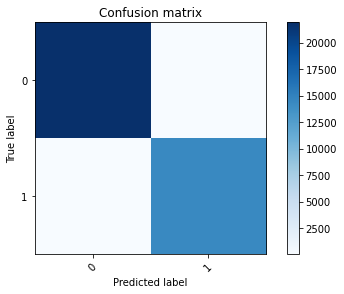

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21938
           1       1.00      1.00      1.00     14459

    accuracy                           1.00     36397
   macro avg       1.00      1.00      1.00     36397
weighted avg       1.00      1.00      1.00     36397



In [ ]:
import numpy as np

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix
cm = confusion_matrix(true_classes, predict_classes)
print(cm)


print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, diagnosis)
plt.show()

print(classification_report(true_classes, predict_classes))

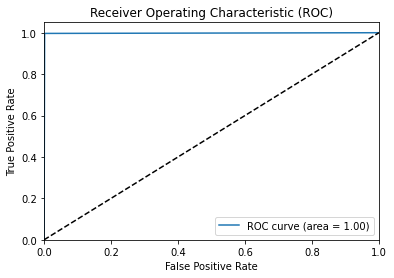

In [ ]:
pred = model.predict(x_test)
pred = pred[:,1] # Only positive class (M)
plot_roc(predict_classes,true_classes)

###**Best Model for Fully-Connected Neural Networks**###
Below is the best model we could create for fully-connected neural networks after some parameter tuning.

In [ ]:
modelSig = Sequential()

modelSig.add(Dense(64, input_dim=40, activation='sigmoid')) # Hidden 1     #  why input_dim=x.shape[1]?  
modelSig.add(Dense(32, activation='sigmoid')) # Hidden 3
modelSig.add(Dense(16, activation='sigmoid')) # Hidden 4
modelSig.add(Dense(8, activation='sigmoid')) # Hidden 5
modelSig.add(Dense(4, activation='sigmoid')) # Hidden 6
modelSig.add(Dense(2, activation='softmax')) # Output

#modelSig.compile(loss='mean_squared_error', optimizer='adam')
modelSig.compile(loss='categorical_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=0, patience = 2, verbose = 2, mode = 'auto')

#model.fit(x,y,verbose=2,epochs=100)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
modelSig.fit(x_train,y_train, validation_data = (x_test, y_test), callbacks=[monitor], verbose=2,epochs=100)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.

Epoch 1/100
3413/3413 - 9s - loss: 0.1207 - val_loss: 0.0518 - 9s/epoch - 3ms/step
Epoch 2/100
3413/3413 - 9s - loss: 0.0244 - val_loss: 0.0150 - 9s/epoch - 3ms/step
Epoch 3/100
3413/3413 - 9s - loss: 0.0152 - val_loss: 0.0128 - 9s/epoch - 3ms/step
Epoch 4/100
3413/3413 - 11s - loss: 0.0131 - val_loss: 0.0113 - 11s/epoch - 3ms/step
Epoch 5/100
3413/3413 - 9s - loss: 0.0117 - val_loss: 0.0095 - 9s/epoch - 3ms/step
Epoch 6/100
3413/3413 - 9s - loss: 0.0109 - val_loss: 0.0096 - 9s/epoch - 3ms/step
Epoch 7/100
3413/3413 - 9s - loss: 0.0099 - val_loss: 0.0091 - 9s/epoch - 3ms/step
Epoch 8/100
3413/3413 - 9s - loss: 0.0093 - val_loss: 0.0082 - 9s/epoch - 3ms/step
Epoch 9/100
3413/3413 - 9s - loss: 0.0089 - val_loss: 0.0089 - 9s/epoch - 3ms/step
Epoch 10/100
3413/3413 - 9s - loss: 0.0085 - val_loss: 0.0077 - 9s/epoch - 3ms/step
Epoch 11/100
3413/3413 - 9s - loss: 0.0082 - val_loss: 0.0091 - 9s/epoch - 3ms/step
Epoch 12/100
3413/3413 - 9s - loss: 0.0080 - val_loss: 0.0076 - 9s/epoch - 3ms/step

In [ ]:
modelSig.save(os.path.join('U:\Downloads\Jupyter', 'trial2.hdf5'))

In [ ]:
pred2 = modelSig.predict(x_test)
#print("Shape: {}".format(pred2.shape))
#print(pred2[0:5])

In [ ]:
score = np.sqrt(metrics.mean_squared_error(pred2,y_test))
print('Final score (RMSE): {}'.format(score))

Final score (RMSE): 0.04273755103349686


In [ ]:
predict_classes = np.argmax(pred2,axis=1)

true_classes = np.argmax(y_test,axis=1)

print("Predictions: {}".format(predict_classes))
print("True: {}".format(true_classes))

Predictions: [0 1 0 ... 1 0 0]
True: [0 1 0 ... 1 0 0]


In [ ]:
correct = metrics.accuracy_score(true_classes, predict_classes)
print("Accuracy: {}".format(correct))
precision = metrics.precision_score(true_classes, predict_classes, average= "weighted")
print("Precision score: {}".format(precision))
recall = metrics.recall_score(true_classes, predict_classes, average= "weighted")
print("Recall score: {}".format(recall))
f1 = metrics.f1_score(true_classes, predict_classes, average= "weighted")
print("F1 score: {}".format(f1))
"""
# Generate predictions
pred = model.predict(x_test)

print("Numpy array of predictions")
print(pred[0:5])
print()
print("y_test:")
print(y_test[0:5])

score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))
"""

Accuracy: 0.9978020166497239
Precision score: 0.997803541628824
Recall score: 0.9978020166497239
F1 score: 0.9978023265096002


'\n# Generate predictions\npred = model.predict(x_test)\n\nprint("Numpy array of predictions")\nprint(pred[0:5])\nprint()\nprint("y_test:")\nprint(y_test[0:5])\n\nscore = metrics.log_loss(y_test, pred)\nprint("Log loss score: {}".format(score))\n'

In [ ]:
modelTan = Sequential()

modelTan.add(Dense(64, input_dim=40, activation='tanh')) # Hidden 1     #  why input_dim=x.shape[1]?  
modelTan.add(Dense(32, activation='tanh')) # Hidden 3
modelTan.add(Dense(16, activation='tanh')) # Hidden 4
modelTan.add(Dense(8, activation='tanh')) # Hidden 5
modelTan.add(Dense(4, activation='tanh')) # Hidden 6
modelTan.add(Dense(2, activation='tanh')) # Output

#modelTan.compile(loss='mean_squared_error', optimizer='adam')
modelTan.compile(loss='categorical_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=0, patience = 2, verbose = 2, mode = 'auto')

#model.fit(x,y,verbose=2,epochs=100)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
modelTan.fit(x_train,y_train, validation_data = (x_test, y_test), callbacks=[monitor], verbose=2,epochs=100)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.

Epoch 1/100
3413/3413 - 10s - loss: 2.0149 - val_loss: 0.5354 - 10s/epoch - 3ms/step
Epoch 2/100
3413/3413 - 9s - loss: 2.2142 - val_loss: 0.0789 - 9s/epoch - 3ms/step
Epoch 3/100
3413/3413 - 10s - loss: 0.1099 - val_loss: 0.0403 - 10s/epoch - 3ms/step
Epoch 4/100
3413/3413 - 10s - loss: 0.0359 - val_loss: 0.0297 - 10s/epoch - 3ms/step
Epoch 5/100
3413/3413 - 9s - loss: 0.0486 - val_loss: 0.0221 - 9s/epoch - 3ms/step
Epoch 6/100
3413/3413 - 10s - loss: 1.2517 - val_loss: 0.0336 - 10s/epoch - 3ms/step
Epoch 7/100
3413/3413 - 9s - loss: 0.3273 - val_loss: 1.6274 - 9s/epoch - 3ms/step
Epoch 7: early stopping


In [ ]:
modelTan.save(os.path.join('U:\Downloads\Jupyter', 'trial3.hdf5'))

In [ ]:
pred3 = modelTan.predict(x_test)
#print("Shape: {}".format(pred2.shape))
#print(pred2[0:5])

In [ ]:
score = np.sqrt(metrics.mean_squared_error(pred3,y_test))
print('Final score (RMSE): {}'.format(score))

predict_classes = np.argmax(pred3,axis=1)

true_classes = np.argmax(y_test,axis=1)

print("Predictions: {}".format(predict_classes))
print("True: {}".format(true_classes))

correct = metrics.accuracy_score(true_classes, predict_classes)
print("Accuracy: {}".format(correct))
precision = metrics.precision_score(true_classes, predict_classes, average= "weighted")
print("Precision score: {}".format(precision))
recall = metrics.recall_score(true_classes, predict_classes, average= "weighted")
print("Recall score: {}".format(recall))
f1 = metrics.f1_score(true_classes, predict_classes, average= "weighted")
print("F1 score: {}".format(f1))
"""
# Generate predictions
pred = model.predict(x_test)

print("Numpy array of predictions")
print(pred[0:5])
print()
print("y_test:")
print(y_test[0:5])

score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))
"""

Final score (RMSE): 0.9503727555274963
Predictions: [0 0 0 ... 0 0 0]
True: [0 1 0 ... 1 0 0]
Accuracy: 0.6025771354781988
Precision score: 0.36325842098652755
Recall score: 0.6025771354781988
F1 score: 0.4532680895650783


'\n# Generate predictions\npred = model.predict(x_test)\n\nprint("Numpy array of predictions")\nprint(pred[0:5])\nprint()\nprint("y_test:")\nprint(y_test[0:5])\n\nscore = metrics.log_loss(y_test, pred)\nprint("Log loss score: {}".format(score))\n'

In [ ]:
modelSigS = Sequential()

modelSigS.add(Dense(64, input_dim=40, activation='sigmoid')) # Hidden 1     #  why input_dim=x.shape[1]?  
modelSigS.add(Dense(32, activation='sigmoid')) # Hidden 3
modelSigS.add(Dense(16, activation='sigmoid')) # Hidden 4
modelSigS.add(Dense(8, activation='sigmoid')) # Hidden 5
modelSigS.add(Dense(4, activation='sigmoid')) # Hidden 6
modelSigS.add(Dense(2, activation='softmax')) # Output

#modelSig.compile(loss='mean_squared_error', optimizer='adam')
modelSigS.compile(loss='categorical_crossentropy', optimizer='sgd')

monitor = EarlyStopping(monitor='val_loss', min_delta=0, patience = 2, verbose = 2, mode = 'auto')

#model.fit(x,y,verbose=2,epochs=100)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
modelSigS.fit(x_train,y_train, validation_data = (x_test, y_test), callbacks=[monitor], verbose=2,epochs=100)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.

Epoch 1/100
3413/3413 - 8s - loss: 0.6718 - val_loss: 0.6719 - 8s/epoch - 2ms/step
Epoch 2/100
3413/3413 - 8s - loss: 0.6714 - val_loss: 0.6715 - 8s/epoch - 2ms/step
Epoch 3/100
3413/3413 - 8s - loss: 0.6712 - val_loss: 0.6714 - 8s/epoch - 2ms/step
Epoch 4/100
3413/3413 - 8s - loss: 0.6710 - val_loss: 0.6713 - 8s/epoch - 2ms/step
Epoch 5/100
3413/3413 - 8s - loss: 0.6708 - val_loss: 0.6708 - 8s/epoch - 2ms/step
Epoch 6/100
3413/3413 - 8s - loss: 0.6704 - val_loss: 0.6704 - 8s/epoch - 2ms/step
Epoch 7/100
3413/3413 - 8s - loss: 0.6695 - val_loss: 0.6690 - 8s/epoch - 2ms/step
Epoch 8/100
3413/3413 - 8s - loss: 0.6674 - val_loss: 0.6657 - 8s/epoch - 2ms/step
Epoch 9/100
3413/3413 - 8s - loss: 0.6597 - val_loss: 0.6489 - 8s/epoch - 2ms/step
Epoch 10/100
3413/3413 - 8s - loss: 0.5574 - val_loss: 0.3399 - 8s/epoch - 2ms/step
Epoch 11/100
3413/3413 - 8s - loss: 0.1924 - val_loss: 0.1278 - 8s/epoch - 2ms/step
Epoch 12/100
3413/3413 - 8s - loss: 0.1123 - val_loss: 0.1044 - 8s/epoch - 2ms/step
E

In [ ]:
modelSigS.save(os.path.join('U:\Downloads\Jupyter', 'trial4.hdf5'))

In [ ]:
pred4 = modelSigS.predict(x_test)
#print("Shape: {}".format(pred2.shape))
#print(pred2[0:5])

In [ ]:
score = np.sqrt(metrics.mean_squared_error(pred4,y_test))
print('Final score (RMSE): {}'.format(score))

predict_classes = np.argmax(pred4,axis=1)

true_classes = np.argmax(y_test,axis=1)

print("Predictions: {}".format(predict_classes))
print("True: {}".format(true_classes))

correct = metrics.accuracy_score(true_classes, predict_classes)
print("Accuracy: {}".format(correct))
precision = metrics.precision_score(true_classes, predict_classes, average= "weighted")
print("Precision score: {}".format(precision))
recall = metrics.recall_score(true_classes, predict_classes, average= "weighted")
print("Recall score: {}".format(recall))
f1 = metrics.f1_score(true_classes, predict_classes, average= "weighted")
print("F1 score: {}".format(f1))
"""
# Generate predictions
pred = model.predict(x_test)

print("Numpy array of predictions")
print(pred[0:5])
print()
print("y_test:")
print(y_test[0:5])

score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))
"""

Final score (RMSE): 0.05307013913989067
Predictions: [0 1 0 ... 1 0 0]
True: [0 1 0 ... 1 0 0]
Accuracy: 0.9967854493502212
Precision score: 0.9967863698559878
Recall score: 0.9967854493502212
F1 score: 0.9967857329534472


'\n# Generate predictions\npred = model.predict(x_test)\n\nprint("Numpy array of predictions")\nprint(pred[0:5])\nprint()\nprint("y_test:")\nprint(y_test[0:5])\n\nscore = metrics.log_loss(y_test, pred)\nprint("Log loss score: {}".format(score))\n'

In [ ]:
modelSigBL = Sequential()

modelSigBL.add(Dense(64, input_dim=40, activation='sigmoid')) # Hidden 1     #  why input_dim=x.shape[1]?  
modelSigBL.add(Dense(56, activation='sigmoid')) # Hidden 2
modelSigBL.add(Dense(48, activation='sigmoid')) # Hidden 3
modelSigBL.add(Dense(40, activation='sigmoid')) # Hidden 4
modelSigBL.add(Dense(32, activation='sigmoid')) # Hidden 5
modelSigBL.add(Dense(24, activation='sigmoid')) # Hidden 6
modelSigBL.add(Dense(16, activation='sigmoid')) # Hidden 7
modelSigBL.add(Dense(8, activation='sigmoid')) # Hidden 8
modelSigBL.add(Dense(4, activation='sigmoid')) # Hidden 9
modelSigBL.add(Dense(2, activation='softmax')) # Output

#modelSig.compile(loss='mean_squared_error', optimizer='adam')
modelSigBL.compile(loss='categorical_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=0, patience = 2, verbose = 2, mode = 'auto')

#model.fit(x,y,verbose=2,epochs=100)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
modelSigBL.fit(x_train,y_train, validation_data = (x_test, y_test), callbacks=[monitor], verbose=2,epochs=100)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.

Epoch 1/100
3413/3413 - 11s - loss: 0.2010 - val_loss: 0.1034 - 11s/epoch - 3ms/step
Epoch 2/100
3413/3413 - 10s - loss: 0.1004 - val_loss: 0.0997 - 10s/epoch - 3ms/step
Epoch 3/100
3413/3413 - 10s - loss: 0.1047 - val_loss: 0.1044 - 10s/epoch - 3ms/step
Epoch 4/100
3413/3413 - 10s - loss: 0.1025 - val_loss: 0.1016 - 10s/epoch - 3ms/step
Epoch 4: early stopping


In [ ]:
modelSigBL.save(os.path.join('U:\Downloads\Jupyter', 'trial5.hdf5'))

In [ ]:
pred5 = modelSigBL.predict(x_test)
#print("Shape: {}".format(pred2.shape))
#print(pred2[0:5])

In [ ]:
score = np.sqrt(metrics.mean_squared_error(pred5,y_test))
print('Final score (RMSE): {}'.format(score))

predict_classes = np.argmax(pred5,axis=1)

true_classes = np.argmax(y_test,axis=1)

print("Predictions: {}".format(predict_classes))
print("True: {}".format(true_classes))

correct = metrics.accuracy_score(true_classes, predict_classes)
print("Accuracy: {}".format(correct))
precision = metrics.precision_score(true_classes, predict_classes, average= "weighted")
print("Precision score: {}".format(precision))
recall = metrics.recall_score(true_classes, predict_classes, average= "weighted")
print("Recall score: {}".format(recall))
f1 = metrics.f1_score(true_classes, predict_classes, average= "weighted")
print("F1 score: {}".format(f1))
"""
# Generate predictions
pred = model.predict(x_test)

print("Numpy array of predictions")
print(pred[0:5])
print()
print("y_test:")
print(y_test[0:5])

score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))
"""

Final score (RMSE): 0.14751118421554565
Predictions: [0 1 0 ... 1 0 0]
True: [0 1 0 ... 1 0 0]
Accuracy: 0.9775256202434267
Precision score: 0.9780955621301518
Recall score: 0.9775256202434267
F1 score: 0.9774226840274512


'\n# Generate predictions\npred = model.predict(x_test)\n\nprint("Numpy array of predictions")\nprint(pred[0:5])\nprint()\nprint("y_test:")\nprint(y_test[0:5])\n\nscore = metrics.log_loss(y_test, pred)\nprint("Log loss score: {}".format(score))\n'

In [ ]:
modelSigSL = Sequential()

modelSigSL.add(Dense(64, input_dim=40, activation='sigmoid')) # Hidden 1     #  why input_dim=x.shape[1]?  
modelSigSL.add(Dense(32, activation='sigmoid')) # Hidden 2
modelSigSL.add(Dense(8, activation='sigmoid')) # Hidden 3
modelSigSL.add(Dense(2, activation='softmax')) # Output

#modelSigSL.compile(loss='mean_squared_error', optimizer='adam')
modelSigSL.compile(loss='categorical_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=0, patience = 2, verbose = 2, mode = 'auto')

#model.fit(x,y,verbose=2,epochs=100)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
modelSigSL.fit(x_train,y_train, validation_data = (x_test, y_test), callbacks=[monitor], verbose=2,epochs=100)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.

Epoch 1/100
3413/3413 - 8s - loss: 0.0662 - val_loss: 0.0191 - 8s/epoch - 2ms/step
Epoch 2/100
3413/3413 - 8s - loss: 0.0155 - val_loss: 0.0124 - 8s/epoch - 2ms/step
Epoch 3/100
3413/3413 - 8s - loss: 0.0131 - val_loss: 0.0118 - 8s/epoch - 2ms/step
Epoch 4/100
3413/3413 - 8s - loss: 0.0118 - val_loss: 0.0105 - 8s/epoch - 2ms/step
Epoch 5/100
3413/3413 - 8s - loss: 0.0109 - val_loss: 0.0101 - 8s/epoch - 2ms/step
Epoch 6/100
3413/3413 - 8s - loss: 0.0097 - val_loss: 0.0102 - 8s/epoch - 2ms/step
Epoch 7/100
3413/3413 - 8s - loss: 0.0094 - val_loss: 0.0098 - 8s/epoch - 2ms/step
Epoch 8/100
3413/3413 - 8s - loss: 0.0085 - val_loss: 0.0083 - 8s/epoch - 2ms/step
Epoch 9/100
3413/3413 - 8s - loss: 0.0081 - val_loss: 0.0102 - 8s/epoch - 2ms/step
Epoch 10/100
3413/3413 - 8s - loss: 0.0079 - val_loss: 0.0075 - 8s/epoch - 2ms/step
Epoch 11/100
3413/3413 - 8s - loss: 0.0074 - val_loss: 0.0076 - 8s/epoch - 2ms/step
Epoch 12/100
3413/3413 - 8s - loss: 0.0072 - val_loss: 0.0100 - 8s/epoch - 2ms/step
E

In [ ]:
modelSigSL.save(os.path.join('U:\Downloads\Jupyter', 'trial6.hdf5'))

In [ ]:
pred6 = modelSigSL.predict(x_test)
#print("Shape: {}".format(pred2.shape))
#print(pred2[0:5])

In [ ]:
score = np.sqrt(metrics.mean_squared_error(pred6,y_test))
print('Final score (RMSE): {}'.format(score))

predict_classes = np.argmax(pred6,axis=1)

true_classes = np.argmax(y_test,axis=1)

print("Predictions: {}".format(predict_classes))
print("True: {}".format(true_classes))

correct = metrics.accuracy_score(true_classes, predict_classes)
print("Accuracy: {}".format(correct))
precision = metrics.precision_score(true_classes, predict_classes, average= "weighted")
print("Precision score: {}".format(precision))
recall = metrics.recall_score(true_classes, predict_classes, average= "weighted")
print("Recall score: {}".format(recall))
f1 = metrics.f1_score(true_classes, predict_classes, average= "weighted")
print("F1 score: {}".format(f1))
"""
# Generate predictions
pred = model.predict(x_test)

print("Numpy array of predictions")
print(pred[0:5])
print()
print("y_test:")
print(y_test[0:5])

score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))
"""

Final score (RMSE): 0.04744195193052292
Predictions: [0 1 0 ... 1 0 0]
True: [0 1 0 ... 1 0 0]
Accuracy: 0.9975547435228178
Precision score: 0.9975582503804307
Recall score: 0.9975547435228178
F1 score: 0.9975553024658789


'\n# Generate predictions\npred = model.predict(x_test)\n\nprint("Numpy array of predictions")\nprint(pred[0:5])\nprint()\nprint("y_test:")\nprint(y_test[0:5])\n\nscore = metrics.log_loss(y_test, pred)\nprint("Log loss score: {}".format(score))\n'

In [ ]:
modelSigBN = Sequential()

modelSigBN.add(Dense(128, input_dim=40, activation='sigmoid')) # Hidden 1     #  why input_dim=x.shape[1]?  
modelSigBN.add(Dense(64, activation='sigmoid')) # Hidden 3
modelSigBN.add(Dense(32, activation='sigmoid')) # Hidden 4
modelSigBN.add(Dense(16, activation='sigmoid')) # Hidden 5
modelSigBN.add(Dense(8, activation='sigmoid')) # Hidden 6
modelSigBN.add(Dense(4, activation='sigmoid')) # Hidden 7
modelSigBN.add(Dense(2, activation='softmax')) # Output

#modelSigBN.compile(loss='mean_squared_error', optimizer='adam')
modelSigBN.compile(loss='categorical_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=0, patience = 2, verbose = 2, mode = 'auto')

#model.fit(x,y,verbose=2,epochs=100)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
modelSigBN.fit(x_train,y_train, validation_data = (x_test, y_test), callbacks=[monitor], verbose=2,epochs=100)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.

Epoch 1/100
3413/3413 - 10s - loss: 0.1776 - val_loss: 0.0980 - 10s/epoch - 3ms/step
Epoch 2/100
3413/3413 - 10s - loss: 0.0854 - val_loss: 0.0556 - 10s/epoch - 3ms/step
Epoch 3/100
3413/3413 - 9s - loss: 0.0510 - val_loss: 0.0484 - 9s/epoch - 3ms/step
Epoch 4/100
3413/3413 - 9s - loss: 0.0355 - val_loss: 0.0156 - 9s/epoch - 3ms/step
Epoch 5/100
3413/3413 - 9s - loss: 0.0147 - val_loss: 0.0118 - 9s/epoch - 3ms/step
Epoch 6/100
3413/3413 - 9s - loss: 0.0127 - val_loss: 0.0118 - 9s/epoch - 3ms/step
Epoch 7/100
3413/3413 - 9s - loss: 0.0113 - val_loss: 0.0128 - 9s/epoch - 3ms/step
Epoch 7: early stopping


In [ ]:
modelSigBN.save(os.path.join('U:\Downloads\Jupyter', 'trial7.hdf5'))

In [ ]:
pred7 = modelSigBN.predict(x_test)
#print("Shape: {}".format(pred2.shape))
#print(pred2[0:5])

In [ ]:
score = np.sqrt(metrics.mean_squared_error(pred7,y_test))
print('Final score (RMSE): {}'.format(score))

predict_classes = np.argmax(pred7,axis=1)

true_classes = np.argmax(y_test,axis=1)

print("Predictions: {}".format(predict_classes))
print("True: {}".format(true_classes))

correct = metrics.accuracy_score(true_classes, predict_classes)
print("Accuracy: {}".format(correct))
precision = metrics.precision_score(true_classes, predict_classes, average= "weighted")
print("Precision score: {}".format(precision))
recall = metrics.recall_score(true_classes, predict_classes, average= "weighted")
print("Recall score: {}".format(recall))
f1 = metrics.f1_score(true_classes, predict_classes, average= "weighted")
print("F1 score: {}".format(f1))
"""
# Generate predictions
pred = model.predict(x_test)

print("Numpy array of predictions")
print(pred[0:5])
print()
print("y_test:")
print(y_test[0:5])

score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))
"""

Final score (RMSE): 0.05380035191774368
Predictions: [0 1 0 ... 1 0 0]
True: [0 1 0 ... 1 0 0]
Accuracy: 0.9965381762233151
Precision score: 0.996543737940787
Recall score: 0.9965381762233151
F1 score: 0.9965366499166715


'\n# Generate predictions\npred = model.predict(x_test)\n\nprint("Numpy array of predictions")\nprint(pred[0:5])\nprint()\nprint("y_test:")\nprint(y_test[0:5])\n\nscore = metrics.log_loss(y_test, pred)\nprint("Log loss score: {}".format(score))\n'

In [ ]:
modelSigSN = Sequential()

modelSigSN.add(Dense(32, input_dim=40, activation='sigmoid')) # Hidden 1     #  why input_dim=x.shape[1]?  
modelSigSN.add(Dense(16, activation='sigmoid')) # Hidden 2
modelSigSN.add(Dense(8, activation='sigmoid')) # Hidden 3
modelSigSN.add(Dense(4, activation='sigmoid')) # Hidden 4
modelSigSN.add(Dense(2, activation='softmax')) # Output

#modelSig.compile(loss='mean_squared_error', optimizer='adam')
modelSigSN.compile(loss='categorical_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=0, patience = 2, verbose = 2, mode = 'auto')

#model.fit(x,y,verbose=2,epochs=100)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
modelSigSN.fit(x_train,y_train, validation_data = (x_test, y_test), callbacks=[monitor], verbose=2,epochs=100)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.

Epoch 1/100
3413/3413 - 9s - loss: 0.1209 - val_loss: 0.0541 - 9s/epoch - 3ms/step
Epoch 2/100
3413/3413 - 8s - loss: 0.0427 - val_loss: 0.0200 - 8s/epoch - 2ms/step
Epoch 3/100
3413/3413 - 8s - loss: 0.0160 - val_loss: 0.0134 - 8s/epoch - 2ms/step
Epoch 4/100
3413/3413 - 8s - loss: 0.0134 - val_loss: 0.0129 - 8s/epoch - 2ms/step
Epoch 5/100
3413/3413 - 8s - loss: 0.0120 - val_loss: 0.0118 - 8s/epoch - 2ms/step
Epoch 6/100
3413/3413 - 8s - loss: 0.0112 - val_loss: 0.0113 - 8s/epoch - 2ms/step
Epoch 7/100
3413/3413 - 8s - loss: 0.0107 - val_loss: 0.0102 - 8s/epoch - 2ms/step
Epoch 8/100
3413/3413 - 8s - loss: 0.0100 - val_loss: 0.0098 - 8s/epoch - 2ms/step
Epoch 9/100
3413/3413 - 8s - loss: 0.0094 - val_loss: 0.0088 - 8s/epoch - 2ms/step
Epoch 10/100
3413/3413 - 8s - loss: 0.0089 - val_loss: 0.0083 - 8s/epoch - 2ms/step
Epoch 11/100
3413/3413 - 8s - loss: 0.0086 - val_loss: 0.0080 - 8s/epoch - 2ms/step
Epoch 12/100
3413/3413 - 8s - loss: 0.0082 - val_loss: 0.0081 - 8s/epoch - 2ms/step
E

In [ ]:
modelSigSN.save(os.path.join('U:\Downloads\Jupyter', 'trial8.hdf5'))

In [ ]:
pred8 = modelSigSN.predict(x_test)
#print("Shape: {}".format(pred2.shape))
#print(pred2[0:5])

In [ ]:
score = np.sqrt(metrics.mean_squared_error(pred8,y_test))
print('Final score (RMSE): {}'.format(score))

predict_classes = np.argmax(pred8,axis=1)

true_classes = np.argmax(y_test,axis=1)

print("Predictions: {}".format(predict_classes))
print("True: {}".format(true_classes))

correct = metrics.accuracy_score(true_classes, predict_classes)
print("Accuracy: {}".format(correct))
precision = metrics.precision_score(true_classes, predict_classes, average= "weighted")
print("Precision score: {}".format(precision))
recall = metrics.recall_score(true_classes, predict_classes, average= "weighted")
print("Recall score: {}".format(recall))
f1 = metrics.f1_score(true_classes, predict_classes, average= "weighted")
print("F1 score: {}".format(f1))
"""
# Generate predictions
pred = model.predict(x_test)

print("Numpy array of predictions")
print(pred[0:5])
print()
print("y_test:")
print(y_test[0:5])

score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))
"""

Final score (RMSE): 0.04507247358560562
Predictions: [0 1 0 ... 1 0 0]
True: [0 1 0 ... 1 0 0]
Accuracy: 0.997499793939061
Precision score: 0.9975008514340395
Recall score: 0.997499793939061
F1 score: 0.9974992457138985


'\n# Generate predictions\npred = model.predict(x_test)\n\nprint("Numpy array of predictions")\nprint(pred[0:5])\nprint()\nprint("y_test:")\nprint(y_test[0:5])\n\nscore = metrics.log_loss(y_test, pred)\nprint("Log loss score: {}".format(score))\n'

##**Convolutional Neural Networks**##
Convolutional neural networks are special types of networks where spatially-closer data are more strongly correlated. This type of network tends to involve computer vision.

###**Varying Hyperparameters**###
We play with hyperparameters to see how they affect our results and as a way to find the best model possible.

###**Early Stopping**###
When it comes to training a neural network, we use early stopping to prevent overfitting. Overfitting is when a neural network begins to memorize rather than generalize.

In [ ]:
# Load modules
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D
from tensorflow.keras.layers import BatchNormalization
from numpy import loadtxt

In [ ]:
dfc2 = dfc
print('Done!')

Done!


In [ ]:
#x = x.reshape((145585, 40, 1, 1))#????????????????????????????????????

In [ ]:
x_train = x_train.reshape((109188, 40, 1, 1))
x_test = x_test.reshape((36397, 40, 1, 1))

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test = tf.keras.utils.to_categorical(y_test, 2)

In [ ]:
#y_one_hot = tf.keras.utils.to_categorical(y, 2)#?????????????????????

In [ ]:
'''
tmp = np.array(x)
tmp = tmp.reshape(-1, 2, 4)
x = pd.DataFrame(sum(map(list, tmp), []))
tmp = []
for i, g in x.groupby(np.arange(len(x)) // 2):
  tmp.append(g)
tmp = np.array([i.to_numpy() for i in tmp])
x = tmp.reshape(768, 2, 4, 1)
'''

In [ ]:
# define a CNN

cnn = Sequential()
cnn.add(Conv1D(64, kernel_size=1, strides=1,
                 activation='relu',
                 input_shape=(40, 1, 1)))

# the above code is equivalent to 
# model.add(Conv1D(64, kernel_size=3, strides=1, activation='relu', input_shape=(128, 1)))

cnn.add(MaxPooling2D(pool_size=(1,1)))

cnn.add(Conv1D(64, kernel_size=1, #strides=(1, 1),
                 activation='relu'))
cnn.add(MaxPooling2D(pool_size=(1,1)))
    
    
cnn.add(Flatten())
cnn.add(Dense(1024, activation="relu"))
cnn.add(Dropout(0.5))
cnn.add(Dense(2, activation="softmax"))

# define optimizer and objective, compile cnn

cnn.compile(loss="categorical_crossentropy", optimizer="adam")

monitor = EarlyStopping(monitor='val_loss', min_delta=0.001, patience = 2, verbose = 2, mode = 'auto')

#cnn.fit(x, y, batch_size = 32, epochs = 100, validation_split = 0.1)
cnn.fit(x, y, epochs = 10, validation_split = 0.1)
#cnn.fit(x_train, y_train, verbose=2, epochs=10)  
#cnn.fit(x_train,y_train, callbacks=[monitor], verbose=2, epochs=10)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
#cnn.fit(x, y, epochs = 10)

Epoch 1/10
4095/4095 [==============================] - 15s 3ms/step - loss: 0.0250 - val_loss: 0.0037
Epoch 2/10
4095/4095 [==============================] - 14s 3ms/step - loss: 0.0124 - val_loss: 0.0091
Epoch 3/10
4095/4095 [==============================] - 14s 3ms/step - loss: 0.0107 - val_loss: 0.0070
Epoch 4/10
4095/4095 [==============================] - 14s 3ms/step - loss: 0.0097 - val_loss: 0.0045
Epoch 5/10
4095/4095 [==============================] - 14s 3ms/step - loss: 0.0088 - val_loss: 0.0038
Epoch 6/10
4095/4095 [==============================] - 14s 4ms/step - loss: 0.0079 - val_loss: 0.0052
Epoch 7/10
4095/4095 [==============================] - 14s 3ms/step - loss: 0.0074 - val_loss: 0.0067
Epoch 8/10
4095/4095 [==============================] - 14s 3ms/step - loss: 0.0074 - val_loss: 0.0185
Epoch 9/10
4095/4095 [==============================] - 14s 3ms/step - loss: 0.0063 - val_loss: 0.0064
Epoch 10/10
4095/4095 [==============================] - 14s 3ms/step - l

In [ ]:
cnn.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_34 (Conv1D)          (None, 40, 1, 64)         128       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 40, 1, 64)        0         
 g2D)                                                            
                                                                 
 conv1d_35 (Conv1D)          (None, 40, 1, 64)         4160      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 40, 1, 64)        0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 2560)              0         
                                                                 
 dense_46 (Dense)            (None, 1024)            

In [ ]:
cnn.save(os.path.join('U:\Downloads\Jupyter', 'trial9.hdf5'))

In [ ]:
pred9 = cnn.predict(x)
#print("Shape: {}".format(pred2.shape))
#print(pred2[0:5])

In [ ]:
score = np.sqrt(metrics.mean_squared_error(pred9,y))
print('Final score (RMSE): {}'.format(score))

predict_classes = np.argmax(pred9,axis=1)

true_classes = np.argmax(y,axis=1)

print("Predictions: {}".format(predict_classes))
print("True: {}".format(true_classes))

correct = metrics.accuracy_score(true_classes, predict_classes)
print("Accuracy: {}".format(correct))
precision = metrics.precision_score(true_classes, predict_classes, average= "weighted")
print("Precision score: {}".format(precision))
recall = metrics.recall_score(true_classes, predict_classes, average= "weighted")
print("Recall score: {}".format(recall))
f1 = metrics.f1_score(true_classes, predict_classes, average= "weighted")
print("F1 score: {}".format(f1))
"""
# Generate predictions
pred = model.predict(x_test)

print("Numpy array of predictions")
print(pred[0:5])
print()
print("y_test:")
print(y_test[0:5])

score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))
"""

Final score (RMSE): 0.03751203045248985
Predictions: [0 0 0 ... 0 0 0]
True: [0 0 0 ... 0 0 0]
Accuracy: 0.9981522821719271
Precision score: 0.9981536474264716
Recall score: 0.9981522821719271
F1 score: 0.9981518718685713


'\n# Generate predictions\npred = model.predict(x_test)\n\nprint("Numpy array of predictions")\nprint(pred[0:5])\nprint()\nprint("y_test:")\nprint(y_test[0:5])\n\nscore = metrics.log_loss(y_test, pred)\nprint("Log loss score: {}".format(score))\n'

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
diagnosis = encode_text_index(dfc,'outcome')

[[87771    60]
 [  209 57545]]
Plotting confusion matrix


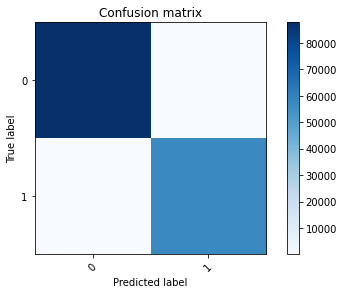

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     87831
           1       1.00      1.00      1.00     57754

    accuracy                           1.00    145585
   macro avg       1.00      1.00      1.00    145585
weighted avg       1.00      1.00      1.00    145585



In [ ]:
import numpy as np

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix
cm = confusion_matrix(true_classes, predict_classes)
print(cm)


print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, diagnosis)
plt.show()

print(classification_report(true_classes, predict_classes))

In [ ]:
# define a CNN

cnnSig = Sequential()
cnnSig.add(Conv1D(64, kernel_size=1, strides=1,
                 activation='sigmoid',
                 input_shape=(40, 1, 1)))

# the above code is equivalent to 
# model.add(Conv1D(64, kernel_size=3, strides=1, activation='relu', input_shape=(128, 1)))

cnnSig.add(MaxPooling2D(pool_size=(1,1)))

cnnSig.add(Conv1D(64, kernel_size=1, #strides=(1, 1),
                 activation='sigmoid'))
cnnSig.add(MaxPooling2D(pool_size=(1,1)))
    
    
cnnSig.add(Flatten())
cnnSig.add(Dense(1024, activation="sigmoid"))
cnnSig.add(Dropout(0.5))
cnnSig.add(Dense(2, activation="softmax"))

# define optimizer and objective, compile cnn

cnnSig.compile(loss="categorical_crossentropy", optimizer="adam")

monitor = EarlyStopping(monitor='val_loss', min_delta=0.001, patience = 2, verbose = 2, mode = 'auto')

#cnn.fit(x, y, batch_size = 32, epochs = 100, validation_split = 0.1)
cnnSig.fit(x, y, epochs = 10, validation_split = 0.1)
#cnn.fit(x_train, y_train, verbose=2, epochs=10)  
#cnn.fit(x_train,y_train, callbacks=[monitor], verbose=2, epochs=10)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
#cnn.fit(x, y, epochs = 10)


Epoch 1/10
4095/4095 [==============================] - 15s 4ms/step - loss: 0.0764 - val_loss: 0.0084
Epoch 2/10
4095/4095 [==============================] - 16s 4ms/step - loss: 0.0199 - val_loss: 0.0071
Epoch 3/10
4095/4095 [==============================] - 17s 4ms/step - loss: 0.0161 - val_loss: 0.0108
Epoch 4/10
4095/4095 [==============================] - 15s 4ms/step - loss: 0.0146 - val_loss: 0.0094
Epoch 5/10
4095/4095 [==============================] - 15s 4ms/step - loss: 0.0136 - val_loss: 0.0083
Epoch 6/10
4095/4095 [==============================] - 17s 4ms/step - loss: 0.0131 - val_loss: 0.0059
Epoch 7/10
4095/4095 [==============================] - 15s 4ms/step - loss: 0.0119 - val_loss: 0.0076
Epoch 8/10
4095/4095 [==============================] - 15s 4ms/step - loss: 0.0123 - val_loss: 0.0080
Epoch 9/10
4095/4095 [==============================] - 14s 3ms/step - loss: 0.0117 - val_loss: 0.0062
Epoch 10/10
4095/4095 [==============================] - 15s 4ms/step - l

In [ ]:
cnnSig.save(os.path.join('U:\Downloads\Jupyter', 'trial10.hdf5'))

In [ ]:
pred10 = cnnSig.predict(x)
#print("Shape: {}".format(pred2.shape))
#print(pred2[0:5])

In [ ]:
score = np.sqrt(metrics.mean_squared_error(pred10,y))
print('Final score (RMSE): {}'.format(score))

predict_classes = np.argmax(pred10,axis=1)

true_classes = np.argmax(y,axis=1)

print("Predictions: {}".format(predict_classes))
print("True: {}".format(true_classes))

correct = metrics.accuracy_score(true_classes, predict_classes)
print("Accuracy: {}".format(correct))
precision = metrics.precision_score(true_classes, predict_classes, average= "weighted")
print("Precision score: {}".format(precision))
recall = metrics.recall_score(true_classes, predict_classes, average= "weighted")
print("Recall score: {}".format(recall))
f1 = metrics.f1_score(true_classes, predict_classes, average= "weighted")
print("F1 score: {}".format(f1))
"""
# Generate predictions
pred = model.predict(x_test)

print("Numpy array of predictions")
print(pred[0:5])
print()
print("y_test:")
print(y_test[0:5])

score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))
"""

Final score (RMSE): 0.048625554889440536
Predictions: [0 0 0 ... 0 0 0]
True: [0 0 0 ... 0 0 0]
Accuracy: 0.9972318576776453
Precision score: 0.9972346808714332
Recall score: 0.9972318576776453
F1 score: 0.9972324007893386


'\n# Generate predictions\npred = model.predict(x_test)\n\nprint("Numpy array of predictions")\nprint(pred[0:5])\nprint()\nprint("y_test:")\nprint(y_test[0:5])\n\nscore = metrics.log_loss(y_test, pred)\nprint("Log loss score: {}".format(score))\n'

In [ ]:
# define a CNN

cnnTan = Sequential()
cnnTan.add(Conv1D(64, kernel_size=1, strides=1,
                 activation='tanh',
                 input_shape=(40, 1, 1)))

# the above code is equivalent to 
# model.add(Conv1D(64, kernel_size=3, strides=1, activation='relu', input_shape=(128, 1)))

cnnTan.add(MaxPooling2D(pool_size=(1,1)))

cnnTan.add(Conv1D(64, kernel_size=1, #strides=(1, 1),
                 activation='tanh'))
cnnTan.add(MaxPooling2D(pool_size=(1,1)))
    
    
cnnTan.add(Flatten())
cnnTan.add(Dense(1024, activation="tanh"))
cnnTan.add(Dropout(0.5))
cnnTan.add(Dense(2, activation="softmax"))

# define optimizer and objective, compile cnn

cnnTan.compile(loss="categorical_crossentropy", optimizer="adam")

monitor = EarlyStopping(monitor='val_loss', min_delta=0.001, patience = 2, verbose = 2, mode = 'auto')

#cnn.fit(x, y, batch_size = 32, epochs = 100, validation_split = 0.1)
cnnTan.fit(x, y, epochs = 10, validation_split = 0.1)
#cnn.fit(x_train, y_train, verbose=2, epochs=10)  
#cnn.fit(x_train,y_train, callbacks=[monitor], verbose=2, epochs=10)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
#cnn.fit(x, y, epochs = 10)

Epoch 1/10
4095/4095 [==============================] - 15s 4ms/step - loss: 0.0338 - val_loss: 0.0151
Epoch 2/10
4095/4095 [==============================] - 15s 4ms/step - loss: 0.0275 - val_loss: 0.0155
Epoch 3/10
4095/4095 [==============================] - 16s 4ms/step - loss: 0.0275 - val_loss: 0.0076
Epoch 4/10
4095/4095 [==============================] - 15s 4ms/step - loss: 0.0263 - val_loss: 0.0087
Epoch 5/10
4095/4095 [==============================] - 15s 4ms/step - loss: 0.0269 - val_loss: 0.0121
Epoch 6/10
4095/4095 [==============================] - 15s 4ms/step - loss: 0.0265 - val_loss: 0.0107
Epoch 7/10
4095/4095 [==============================] - 14s 3ms/step - loss: 0.0256 - val_loss: 0.0085
Epoch 8/10
4095/4095 [==============================] - 14s 3ms/step - loss: 0.0274 - val_loss: 0.0090
Epoch 9/10
4095/4095 [==============================] - 14s 3ms/step - loss: 0.0258 - val_loss: 0.0099
Epoch 10/10
4095/4095 [==============================] - 14s 3ms/step - l

In [ ]:
cnnTan.save(os.path.join('U:\Downloads\Jupyter', 'trial11.hdf5'))

In [ ]:
pred11 = cnnTan.predict(x)
#print("Shape: {}".format(pred2.shape))
#print(pred2[0:5])

In [ ]:
score = np.sqrt(metrics.mean_squared_error(pred11,y))
print('Final score (RMSE): {}'.format(score))

predict_classes = np.argmax(pred11,axis=1)

true_classes = np.argmax(y,axis=1)

print("Predictions: {}".format(predict_classes))
print("True: {}".format(true_classes))

correct = metrics.accuracy_score(true_classes, predict_classes)
print("Accuracy: {}".format(correct))
precision = metrics.precision_score(true_classes, predict_classes, average= "weighted")
print("Precision score: {}".format(precision))
recall = metrics.recall_score(true_classes, predict_classes, average= "weighted")
print("Recall score: {}".format(recall))
f1 = metrics.f1_score(true_classes, predict_classes, average= "weighted")
print("F1 score: {}".format(f1))
"""
# Generate predictions
pred = model.predict(x_test)

print("Numpy array of predictions")
print(pred[0:5])
print()
print("y_test:")
print(y_test[0:5])

score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))
"""

Final score (RMSE): 0.059291720390319824
Predictions: [0 0 0 ... 0 0 0]
True: [0 0 0 ... 0 0 0]
Accuracy: 0.9951780746642854
Precision score: 0.9951850441692354
Recall score: 0.9951780746642854
F1 score: 0.9951755412205202


'\n# Generate predictions\npred = model.predict(x_test)\n\nprint("Numpy array of predictions")\nprint(pred[0:5])\nprint()\nprint("y_test:")\nprint(y_test[0:5])\n\nscore = metrics.log_loss(y_test, pred)\nprint("Log loss score: {}".format(score))\n'

In [ ]:
# define a CNN

cnnS = Sequential()
cnnS.add(Conv1D(64, kernel_size=1, strides=1,
                 activation='relu',
                 input_shape=(40, 1, 1)))

# the above code is equivalent to 
# model.add(Conv1D(64, kernel_size=3, strides=1, activation='relu', input_shape=(128, 1)))

cnnS.add(MaxPooling2D(pool_size=(1,1)))

cnnS.add(Conv1D(64, kernel_size=1, #strides=(1, 1),
                 activation='relu'))
cnnS.add(MaxPooling2D(pool_size=(1,1)))
    
    
cnnS.add(Flatten())
cnnS.add(Dense(1024, activation="relu"))
cnnS.add(Dropout(0.5))
cnnS.add(Dense(2, activation="softmax"))

# define optimizer and objective, compile cnn

cnnS.compile(loss="categorical_crossentropy", optimizer="sgd")

monitor = EarlyStopping(monitor='val_loss', min_delta=0.001, patience = 2, verbose = 2, mode = 'auto')

#cnn.fit(x, y, batch_size = 32, epochs = 100, validation_split = 0.1)
cnnS.fit(x, y, epochs = 10, validation_split = 0.1)
#cnn.fit(x_train, y_train, verbose=2, epochs=10)  
#cnn.fit(x_train,y_train, callbacks=[monitor], verbose=2, epochs=10)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
#cnn.fit(x, y, epochs = 10)

Epoch 1/10
4095/4095 [==============================] - 14s 3ms/step - loss: 0.0778 - val_loss: 0.0298
Epoch 2/10
4095/4095 [==============================] - 15s 4ms/step - loss: 0.0385 - val_loss: 0.0325
Epoch 3/10
4095/4095 [==============================] - 14s 3ms/step - loss: 0.0252 - val_loss: 0.0111
Epoch 4/10
4095/4095 [==============================] - 14s 3ms/step - loss: 0.0213 - val_loss: 0.0095
Epoch 5/10
4095/4095 [==============================] - 14s 3ms/step - loss: 0.0178 - val_loss: 0.0142
Epoch 6/10
4095/4095 [==============================] - 14s 3ms/step - loss: 0.0169 - val_loss: 0.0121
Epoch 7/10
4095/4095 [==============================] - 15s 4ms/step - loss: 0.0152 - val_loss: 0.0089
Epoch 8/10
4095/4095 [==============================] - 15s 4ms/step - loss: 0.0149 - val_loss: 0.0112
Epoch 9/10
4095/4095 [==============================] - 14s 4ms/step - loss: 0.0133 - val_loss: 0.0120
Epoch 10/10
4095/4095 [==============================] - 13s 3ms/step - l

In [ ]:
cnnS.save(os.path.join('U:\Downloads\Jupyter', 'trial12.hdf5'))

In [ ]:
pred12 = cnnS.predict(x)
#print("Shape: {}".format(pred2.shape))
#print(pred2[0:5])

In [ ]:
score = np.sqrt(metrics.mean_squared_error(pred12,y))
print('Final score (RMSE): {}'.format(score))

predict_classes = np.argmax(pred11,axis=1)

true_classes = np.argmax(y,axis=1)

print("Predictions: {}".format(predict_classes))
print("True: {}".format(true_classes))

correct = metrics.accuracy_score(true_classes, predict_classes)
print("Accuracy: {}".format(correct))
precision = metrics.precision_score(true_classes, predict_classes, average= "weighted")
print("Precision score: {}".format(precision))
recall = metrics.recall_score(true_classes, predict_classes, average= "weighted")
print("Recall score: {}".format(recall))
f1 = metrics.f1_score(true_classes, predict_classes, average= "weighted")
print("F1 score: {}".format(f1))
"""
# Generate predictions
pred = model.predict(x_test)

print("Numpy array of predictions")
print(pred[0:5])
print()
print("y_test:")
print(y_test[0:5])

score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))
"""

Final score (RMSE): 0.0509733185172081
Predictions: [0 0 0 ... 0 0 0]
True: [0 0 0 ... 0 0 0]
Accuracy: 0.9951780746642854
Precision score: 0.9951850441692354
Recall score: 0.9951780746642854
F1 score: 0.9951755412205202


'\n# Generate predictions\npred = model.predict(x_test)\n\nprint("Numpy array of predictions")\nprint(pred[0:5])\nprint()\nprint("y_test:")\nprint(y_test[0:5])\n\nscore = metrics.log_loss(y_test, pred)\nprint("Log loss score: {}".format(score))\n'

In [ ]:
# define a CNN

cnnBL = Sequential()
cnnBL.add(Conv1D(64, kernel_size=1, strides=1,
                 activation='relu',
                 input_shape=(40, 1, 1)))

# the above code is equivalent to 
# model.add(Conv1D(64, kernel_size=3, strides=1, activation='relu', input_shape=(128, 1)))

cnnBL.add(MaxPooling2D(pool_size=(1,1)))

cnnBL.add(Conv1D(64, kernel_size=1, #strides=(1, 1),
                 activation='relu'))
cnnBL.add(MaxPooling2D(pool_size=(1,1)))
    
cnnBL.add(MaxPooling2D(pool_size=(1,1)))

cnnBL.add(Conv1D(64, kernel_size=1, #strides=(1, 1),
                 activation='relu'))
cnnBL.add(MaxPooling2D(pool_size=(1,1)))
    
cnnBL.add(MaxPooling2D(pool_size=(1,1)))

cnnBL.add(Conv1D(64, kernel_size=1, #strides=(1, 1),
                 activation='relu'))
cnnBL.add(MaxPooling2D(pool_size=(1,1)))
    
cnnBL.add(Flatten())
cnnBL.add(Dense(1024, activation="relu"))
cnnBL.add(Dropout(0.5))
cnnBL.add(Dense(2, activation="softmax"))

# define optimizer and objective, compile cnn

cnnBL.compile(loss="categorical_crossentropy", optimizer="adam")

monitor = EarlyStopping(monitor='val_loss', min_delta=0.001, patience = 2, verbose = 2, mode = 'auto')

#cnn.fit(x, y, batch_size = 32, epochs = 100, validation_split = 0.1)
cnnBL.fit(x, y, epochs = 10, validation_split = 0.1)
#cnn.fit(x_train, y_train, verbose=2, epochs=10)  
#cnn.fit(x_train,y_train, callbacks=[monitor], verbose=2, epochs=10)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
#cnn.fit(x, y, epochs = 10)

Epoch 1/10
4095/4095 [==============================] - 21s 5ms/step - loss: 0.0243 - val_loss: 0.0077
Epoch 2/10
4095/4095 [==============================] - 19s 5ms/step - loss: 0.0131 - val_loss: 0.0178
Epoch 3/10
4095/4095 [==============================] - 22s 5ms/step - loss: 0.0113 - val_loss: 0.0066
Epoch 4/10
4095/4095 [==============================] - 21s 5ms/step - loss: 0.0103 - val_loss: 0.0124
Epoch 5/10
4095/4095 [==============================] - 20s 5ms/step - loss: 0.0086 - val_loss: 0.0078
Epoch 6/10
4095/4095 [==============================] - 21s 5ms/step - loss: 0.0077 - val_loss: 0.0218
Epoch 7/10
4095/4095 [==============================] - 20s 5ms/step - loss: 0.0071 - val_loss: 0.0235
Epoch 8/10
4095/4095 [==============================] - 21s 5ms/step - loss: 0.0068 - val_loss: 0.0216
Epoch 9/10
4095/4095 [==============================] - 20s 5ms/step - loss: 0.0066 - val_loss: 0.0289
Epoch 10/10
4095/4095 [==============================] - 20s 5ms/step - l

In [ ]:
cnnBL.save(os.path.join('U:\Downloads\Jupyter', 'trial13.hdf5'))

In [ ]:
pred13 = cnnS.predict(x)
#print("Shape: {}".format(pred2.shape))
#print(pred2[0:5])

In [ ]:
score = np.sqrt(metrics.mean_squared_error(pred13,y))
print('Final score (RMSE): {}'.format(score))

predict_classes = np.argmax(pred11,axis=1)

true_classes = np.argmax(y,axis=1)

print("Predictions: {}".format(predict_classes))
print("True: {}".format(true_classes))

correct = metrics.accuracy_score(true_classes, predict_classes)
print("Accuracy: {}".format(correct))
precision = metrics.precision_score(true_classes, predict_classes, average= "weighted")
print("Precision score: {}".format(precision))
recall = metrics.recall_score(true_classes, predict_classes, average= "weighted")
print("Recall score: {}".format(recall))
f1 = metrics.f1_score(true_classes, predict_classes, average= "weighted")
print("F1 score: {}".format(f1))
"""
# Generate predictions
pred = model.predict(x_test)

print("Numpy array of predictions")
print(pred[0:5])
print()
print("y_test:")
print(y_test[0:5])

score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))
"""

Final score (RMSE): 0.0509733185172081
Predictions: [0 0 0 ... 0 0 0]
True: [0 0 0 ... 0 0 0]
Accuracy: 0.9951780746642854
Precision score: 0.9951850441692354
Recall score: 0.9951780746642854
F1 score: 0.9951755412205202


'\n# Generate predictions\npred = model.predict(x_test)\n\nprint("Numpy array of predictions")\nprint(pred[0:5])\nprint()\nprint("y_test:")\nprint(y_test[0:5])\n\nscore = metrics.log_loss(y_test, pred)\nprint("Log loss score: {}".format(score))\n'

In [ ]:
# define a CNN

cnnSL = Sequential()
cnnSL.add(Conv1D(64, kernel_size=1, strides=1,
                 activation='relu',
                 input_shape=(40, 1, 1)))

# the above code is equivalent to 
# model.add(Conv1D(64, kernel_size=3, strides=1, activation='relu', input_shape=(128, 1)))

cnnSL.add(MaxPooling2D(pool_size=(1,1)))

cnnSL.add(Conv1D(64, kernel_size=1, #strides=(1, 1),
                 activation='relu'))
cnnSL.add(MaxPooling2D(pool_size=(1,1)))
    
    
cnnSL.add(Flatten())
cnnSL.add(Dense(1024, activation="relu"))
cnnSL.add(Dropout(0.5))
cnnSL.add(Dense(2, activation="softmax"))

# define optimizer and objective, compile cnn

cnnSL.compile(loss="categorical_crossentropy", optimizer="adam")

monitor = EarlyStopping(monitor='val_loss', min_delta=0.001, patience = 2, verbose = 2, mode = 'auto')

#cnn.fit(x, y, batch_size = 32, epochs = 100, validation_split = 0.1)
cnnSL.fit(x, y, epochs = 10, validation_split = 0.1)
#cnn.fit(x_train, y_train, verbose=2, epochs=10)  
#cnn.fit(x_train,y_train, callbacks=[monitor], verbose=2, epochs=10)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
#cnn.fit(x, y, epochs = 10)

Epoch 1/10
4095/4095 [==============================] - 15s 3ms/step - loss: 0.0250 - val_loss: 0.0043
Epoch 2/10
4095/4095 [==============================] - 15s 4ms/step - loss: 0.0133 - val_loss: 0.0041
Epoch 3/10
4095/4095 [==============================] - 16s 4ms/step - loss: 0.0106 - val_loss: 0.0056
Epoch 4/10
4095/4095 [==============================] - 14s 4ms/step - loss: 0.0097 - val_loss: 0.0055
Epoch 5/10
4095/4095 [==============================] - 15s 4ms/step - loss: 0.0086 - val_loss: 0.0100
Epoch 6/10
4095/4095 [==============================] - 15s 4ms/step - loss: 0.0081 - val_loss: 0.0060
Epoch 7/10
4095/4095 [==============================] - 15s 4ms/step - loss: 0.0078 - val_loss: 0.0086
Epoch 8/10
4095/4095 [==============================] - 17s 4ms/step - loss: 0.0070 - val_loss: 0.0152
Epoch 9/10
4095/4095 [==============================] - 15s 4ms/step - loss: 0.0066 - val_loss: 0.0107
Epoch 10/10
4095/4095 [==============================] - 15s 4ms/step - l

In [ ]:
cnnSL.save(os.path.join('U:\Downloads\Jupyter', 'trial14.hdf5'))

In [ ]:
pred14 = cnnSL.predict(x)
#print("Shape: {}".format(pred2.shape))
#print(pred2[0:5])

In [ ]:
score = np.sqrt(metrics.mean_squared_error(pred14,y))
print('Final score (RMSE): {}'.format(score))

predict_classes = np.argmax(pred11,axis=1)

true_classes = np.argmax(y,axis=1)

print("Predictions: {}".format(predict_classes))
print("True: {}".format(true_classes))

correct = metrics.accuracy_score(true_classes, predict_classes)
print("Accuracy: {}".format(correct))
precision = metrics.precision_score(true_classes, predict_classes, average= "weighted")
print("Precision score: {}".format(precision))
recall = metrics.recall_score(true_classes, predict_classes, average= "weighted")
print("Recall score: {}".format(recall))
f1 = metrics.f1_score(true_classes, predict_classes, average= "weighted")
print("F1 score: {}".format(f1))
"""
# Generate predictions
pred = model.predict(x_test)

print("Numpy array of predictions")
print(pred[0:5])
print()
print("y_test:")
print(y_test[0:5])

score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))
"""

Final score (RMSE): 0.037348534911870956
Predictions: [0 0 0 ... 0 0 0]
True: [0 0 0 ... 0 0 0]
Accuracy: 0.9951780746642854
Precision score: 0.9951850441692354
Recall score: 0.9951780746642854
F1 score: 0.9951755412205202


'\n# Generate predictions\npred = model.predict(x_test)\n\nprint("Numpy array of predictions")\nprint(pred[0:5])\nprint()\nprint("y_test:")\nprint(y_test[0:5])\n\nscore = metrics.log_loss(y_test, pred)\nprint("Log loss score: {}".format(score))\n'

In [ ]:
# define a CNN

cnnBN = Sequential()
cnnBN.add(Conv1D(128, kernel_size=1, strides=1,
                 activation='relu',
                 input_shape=(40, 1, 1)))

# the above code is equivalent to 
# model.add(Conv1D(64, kernel_size=3, strides=1, activation='relu', input_shape=(128, 1)))

cnnBN.add(MaxPooling2D(pool_size=(1,1)))

cnnBN.add(Conv1D(128, kernel_size=1, #strides=(1, 1),
                 activation='relu'))
cnnBN.add(MaxPooling2D(pool_size=(1,1)))
    
    
cnnBN.add(Flatten())
cnnBN.add(Dense(2048, activation="relu"))
cnnBN.add(Dropout(0.5))
cnnBN.add(Dense(2, activation="softmax"))

# define optimizer and objective, compile cnn

cnnBN.compile(loss="categorical_crossentropy", optimizer="adam")

monitor = EarlyStopping(monitor='val_loss', min_delta=0.001, patience = 2, verbose = 2, mode = 'auto')

#cnn.fit(x, y, batch_size = 32, epochs = 100, validation_split = 0.1)
cnnBN.fit(x, y, epochs = 10, validation_split = 0.1)
#cnn.fit(x_train, y_train, verbose=2, epochs=10)  
#cnn.fit(x_train,y_train, callbacks=[monitor], verbose=2, epochs=10)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
#cnn.fit(x, y, epochs = 10)

Epoch 1/10
4095/4095 [==============================] - 21s 5ms/step - loss: 0.0256 - val_loss: 0.0073
Epoch 2/10
4095/4095 [==============================] - 21s 5ms/step - loss: 0.0132 - val_loss: 0.0067
Epoch 3/10
4095/4095 [==============================] - 21s 5ms/step - loss: 0.0109 - val_loss: 0.0064
Epoch 4/10
4095/4095 [==============================] - 20s 5ms/step - loss: 0.0110 - val_loss: 0.0098
Epoch 5/10
4095/4095 [==============================] - 23s 6ms/step - loss: 0.0092 - val_loss: 0.0105
Epoch 6/10
4095/4095 [==============================] - 20s 5ms/step - loss: 0.0083 - val_loss: 0.0081
Epoch 7/10
4095/4095 [==============================] - 21s 5ms/step - loss: 0.0077 - val_loss: 0.0087
Epoch 8/10
4095/4095 [==============================] - 21s 5ms/step - loss: 0.0075 - val_loss: 0.0161
Epoch 9/10
4095/4095 [==============================] - 21s 5ms/step - loss: 0.0071 - val_loss: 0.0049
Epoch 10/10
4095/4095 [==============================] - 21s 5ms/step - l

In [ ]:
cnnBN.save(os.path.join('U:\Downloads\Jupyter', 'trial15.hdf5'))

In [ ]:
pred15 = cnnBN.predict(x)
#print("Shape: {}".format(pred2.shape))
#print(pred2[0:5])

In [ ]:
score = np.sqrt(metrics.mean_squared_error(pred15,y))
print('Final score (RMSE): {}'.format(score))

predict_classes = np.argmax(pred11,axis=1)

true_classes = np.argmax(y,axis=1)

print("Predictions: {}".format(predict_classes))
print("True: {}".format(true_classes))

correct = metrics.accuracy_score(true_classes, predict_classes)
print("Accuracy: {}".format(correct))
precision = metrics.precision_score(true_classes, predict_classes, average= "weighted")
print("Precision score: {}".format(precision))
recall = metrics.recall_score(true_classes, predict_classes, average= "weighted")
print("Recall score: {}".format(recall))
f1 = metrics.f1_score(true_classes, predict_classes, average= "weighted")
print("F1 score: {}".format(f1))
"""
# Generate predictions
pred = model.predict(x_test)

print("Numpy array of predictions")
print(pred[0:5])
print()
print("y_test:")
print(y_test[0:5])

score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))
"""

Final score (RMSE): 0.04040737450122833
Predictions: [0 0 0 ... 0 0 0]
True: [0 0 0 ... 0 0 0]
Accuracy: 0.9951780746642854
Precision score: 0.9951850441692354
Recall score: 0.9951780746642854
F1 score: 0.9951755412205202


'\n# Generate predictions\npred = model.predict(x_test)\n\nprint("Numpy array of predictions")\nprint(pred[0:5])\nprint()\nprint("y_test:")\nprint(y_test[0:5])\n\nscore = metrics.log_loss(y_test, pred)\nprint("Log loss score: {}".format(score))\n'

In [ ]:
# define a CNN

cnnSN = Sequential()
cnnSN.add(Conv1D(32, kernel_size=1, strides=1,
                 activation='relu',
                 input_shape=(40, 1, 1)))

# the above code is equivalent to 
# model.add(Conv1D(64, kernel_size=3, strides=1, activation='relu', input_shape=(128, 1)))

cnnSN.add(MaxPooling2D(pool_size=(1,1)))

cnnSN.add(Conv1D(32, kernel_size=1, #strides=(1, 1),
                 activation='relu'))
cnnSN.add(MaxPooling2D(pool_size=(1,1)))
    
    
cnnSN.add(Flatten())
cnnSN.add(Dense(512, activation="relu"))
cnnSN.add(Dropout(0.5))
cnnSN.add(Dense(2, activation="softmax"))

# define optimizer and objective, compile cnn

cnnSN.compile(loss="categorical_crossentropy", optimizer="adam")

monitor = EarlyStopping(monitor='val_loss', min_delta=0.001, patience = 2, verbose = 2, mode = 'auto')

#cnn.fit(x, y, batch_size = 32, epochs = 100, validation_split = 0.1)
cnnSN.fit(x, y, epochs = 10, validation_split = 0.1)
#cnn.fit(x_train, y_train, verbose=2, epochs=10)  
#cnn.fit(x_train,y_train, callbacks=[monitor], verbose=2, epochs=10)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
#cnn.fit(x, y, epochs = 10)


Epoch 1/10
4095/4095 [==============================] - 13s 3ms/step - loss: 0.0268 - val_loss: 0.0069
Epoch 2/10
4095/4095 [==============================] - 15s 4ms/step - loss: 0.0133 - val_loss: 0.0065
Epoch 3/10
4095/4095 [==============================] - 14s 3ms/step - loss: 0.0110 - val_loss: 0.0066
Epoch 4/10
4095/4095 [==============================] - 14s 4ms/step - loss: 0.0096 - val_loss: 0.0040
Epoch 5/10
4095/4095 [==============================] - 15s 4ms/step - loss: 0.0089 - val_loss: 0.0119
Epoch 6/10
4095/4095 [==============================] - 14s 3ms/step - loss: 0.0085 - val_loss: 0.0197
Epoch 7/10
4095/4095 [==============================] - 13s 3ms/step - loss: 0.0077 - val_loss: 0.0069
Epoch 8/10
4095/4095 [==============================] - 13s 3ms/step - loss: 0.0076 - val_loss: 0.0250
Epoch 9/10
4095/4095 [==============================] - 13s 3ms/step - loss: 0.0070 - val_loss: 0.0152
Epoch 10/10
4095/4095 [==============================] - 15s 4ms/step - l

In [ ]:
cnnSN.save(os.path.join('U:\Downloads\Jupyter', 'trial16.hdf5'))

In [ ]:
pred16 = cnnSN.predict(x)
#print("Shape: {}".format(pred2.shape))
#print(pred2[0:5])

In [ ]:
score = np.sqrt(metrics.mean_squared_error(pred16,y))
print('Final score (RMSE): {}'.format(score))

predict_classes = np.argmax(pred11,axis=1)

true_classes = np.argmax(y,axis=1)

print("Predictions: {}".format(predict_classes))
print("True: {}".format(true_classes))

correct = metrics.accuracy_score(true_classes, predict_classes)
print("Accuracy: {}".format(correct))
precision = metrics.precision_score(true_classes, predict_classes, average= "weighted")
print("Precision score: {}".format(precision))
recall = metrics.recall_score(true_classes, predict_classes, average= "weighted")
print("Recall score: {}".format(recall))
f1 = metrics.f1_score(true_classes, predict_classes, average= "weighted")
print("F1 score: {}".format(f1))
"""
# Generate predictions
pred = model.predict(x_test)

print("Numpy array of predictions")
print(pred[0:5])
print()
print("y_test:")
print(y_test[0:5])

score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))
"""

Final score (RMSE): 0.044604625552892685
Predictions: [0 0 0 ... 0 0 0]
True: [0 0 0 ... 0 0 0]
Accuracy: 0.9951780746642854
Precision score: 0.9951850441692354
Recall score: 0.9951780746642854
F1 score: 0.9951755412205202


'\n# Generate predictions\npred = model.predict(x_test)\n\nprint("Numpy array of predictions")\nprint(pred[0:5])\nprint()\nprint("y_test:")\nprint(y_test[0:5])\n\nscore = metrics.log_loss(y_test, pred)\nprint("Log loss score: {}".format(score))\n'

###**Best Model for Convolutional Neural Networks**###
Below is the best model we could create for convolutional neural networks after some parameter tuning.

In [ ]:
# define a CNN

cnnBKN = Sequential()
cnnBKN.add(Conv1D(64, kernel_size=1, strides=1,
                 activation='relu',
                 input_shape=(40, 1, 1)))

# the above code is equivalent to 
# model.add(Conv1D(64, kernel_size=3, strides=1, activation='relu', input_shape=(128, 1)))

cnnBKN.add(MaxPooling2D(pool_size=(1,1)))

cnnBKN.add(Conv1D(64, kernel_size=1, #strides=(1, 1),
                 activation='relu'))
cnnBKN.add(MaxPooling2D(pool_size=(1,1)))

cnnBKN.add(Conv1D(64, kernel_size=1, #strides=(1, 1),
                 activation='relu'))
cnnBKN.add(Conv1D(64, kernel_size=1, #strides=(1, 1),
                 activation='relu'))
    
cnnBKN.add(Flatten())
cnnBKN.add(Dense(1024, activation="relu"))
cnnBKN.add(Dropout(0.5))
cnnBKN.add(Dense(2, activation="softmax"))

# define optimizer and objective, compile cnn

cnnBKN.compile(loss="categorical_crossentropy", optimizer="adam")

monitor = EarlyStopping(monitor='val_loss', min_delta=0.001, patience = 2, verbose = 2, mode = 'auto')

#cnn.fit(x, y, batch_size = 32, epochs = 100, validation_split = 0.1)
cnnBKN.fit(x, y, epochs = 10, validation_split = 0.1)
#cnn.fit(x_train, y_train, verbose=2, epochs=10)  
#cnn.fit(x_train,y_train, callbacks=[monitor], verbose=2, epochs=10)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
#cnn.fit(x, y, epochs = 10)

Epoch 1/10
4095/4095 [==============================] - 20s 5ms/step - loss: 0.0237 - val_loss: 0.0043
Epoch 2/10
4095/4095 [==============================] - 19s 5ms/step - loss: 0.0132 - val_loss: 0.0051
Epoch 3/10
4095/4095 [==============================] - 19s 5ms/step - loss: 0.0110 - val_loss: 0.0062
Epoch 4/10
4095/4095 [==============================] - 19s 5ms/step - loss: 0.0097 - val_loss: 0.0198
Epoch 5/10
4095/4095 [==============================] - 19s 5ms/step - loss: 0.0089 - val_loss: 0.0063
Epoch 6/10
4095/4095 [==============================] - 18s 5ms/step - loss: 0.0076 - val_loss: 0.0079
Epoch 7/10
4095/4095 [==============================] - 18s 5ms/step - loss: 0.0072 - val_loss: 0.0251
Epoch 8/10
4095/4095 [==============================] - 19s 5ms/step - loss: 0.0067 - val_loss: 0.0184
Epoch 9/10
4095/4095 [==============================] - 18s 5ms/step - loss: 0.0063 - val_loss: 0.0289
Epoch 10/10
4095/4095 [==============================] - 19s 5ms/step - l

In [ ]:
cnnBKN.save(os.path.join('U:\Downloads\Jupyter', 'trial17.hdf5'))

In [ ]:
pred17 = cnnBKN.predict(x)
#print("Shape: {}".format(pred2.shape))
#print(pred2[0:5])

In [ ]:
score = np.sqrt(metrics.mean_squared_error(pred17,y))
print('Final score (RMSE): {}'.format(score))

predict_classes = np.argmax(pred11,axis=1)

true_classes = np.argmax(y,axis=1)

print("Predictions: {}".format(predict_classes))
print("True: {}".format(true_classes))

correct = metrics.accuracy_score(true_classes, predict_classes)
print("Accuracy: {}".format(correct))
precision = metrics.precision_score(true_classes, predict_classes, average= "weighted")
print("Precision score: {}".format(precision))
recall = metrics.recall_score(true_classes, predict_classes, average= "weighted")
print("Recall score: {}".format(recall))
f1 = metrics.f1_score(true_classes, predict_classes, average= "weighted")
print("F1 score: {}".format(f1))
"""
# Generate predictions
pred = model.predict(x_test)

print("Numpy array of predictions")
print(pred[0:5])
print()
print("y_test:")
print(y_test[0:5])

score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))
"""

Final score (RMSE): 0.03723486140370369
Predictions: [0 0 0 ... 0 0 0]
True: [0 0 0 ... 0 0 0]
Accuracy: 0.9951780746642854
Precision score: 0.9951850441692354
Recall score: 0.9951780746642854
F1 score: 0.9951755412205202


'\n# Generate predictions\npred = model.predict(x_test)\n\nprint("Numpy array of predictions")\nprint(pred[0:5])\nprint()\nprint("y_test:")\nprint(y_test[0:5])\n\nscore = metrics.log_loss(y_test, pred)\nprint("Log loss score: {}".format(score))\n'

In [ ]:
# define a CNN

cnnSKN = Sequential()
cnnSKN.add(Conv1D(64, kernel_size=1, strides=1,
                 activation='relu',
                 input_shape=(40, 1, 1)))

# the above code is equivalent to 
# model.add(Conv1D(64, kernel_size=3, strides=1, activation='relu', input_shape=(128, 1)))

cnnSKN.add(MaxPooling2D(pool_size=(1,1)))

cnnSKN.add(MaxPooling2D(pool_size=(1,1)))
    
    
cnnSKN.add(Flatten())
cnnSKN.add(Dense(1024, activation="relu"))
cnnSKN.add(Dropout(0.5))
cnnSKN.add(Dense(2, activation="softmax"))

# define optimizer and objective, compile cnn

cnnSKN.compile(loss="categorical_crossentropy", optimizer="adam")

monitor = EarlyStopping(monitor='val_loss', min_delta=0.001, patience = 2, verbose = 2, mode = 'auto')

#cnn.fit(x, y, batch_size = 32, epochs = 100, validation_split = 0.1)
cnnSKN.fit(x, y, epochs = 10, validation_split = 0.1)
#cnn.fit(x_train, y_train, verbose=2, epochs=10)  
#cnn.fit(x_train,y_train, callbacks=[monitor], verbose=2, epochs=10)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
#cnn.fit(x, y, epochs = 10)

Epoch 1/10
4095/4095 [==============================] - 13s 3ms/step - loss: 0.0416 - val_loss: 0.0088
Epoch 2/10
4095/4095 [==============================] - 12s 3ms/step - loss: 0.0205 - val_loss: 0.0099
Epoch 3/10
4095/4095 [==============================] - 12s 3ms/step - loss: 0.0158 - val_loss: 0.0063
Epoch 4/10
4095/4095 [==============================] - 12s 3ms/step - loss: 0.0143 - val_loss: 0.0235
Epoch 5/10
4095/4095 [==============================] - 12s 3ms/step - loss: 0.0129 - val_loss: 0.0060
Epoch 6/10
4095/4095 [==============================] - 12s 3ms/step - loss: 0.0118 - val_loss: 0.0132
Epoch 7/10
4095/4095 [==============================] - 12s 3ms/step - loss: 0.0122 - val_loss: 0.0177
Epoch 8/10
4095/4095 [==============================] - 12s 3ms/step - loss: 0.0111 - val_loss: 0.0100
Epoch 9/10
4095/4095 [==============================] - 12s 3ms/step - loss: 0.0106 - val_loss: 0.0058
Epoch 10/10
4095/4095 [==============================] - 12s 3ms/step - l

In [ ]:
cnnSKN.save(os.path.join('U:\Downloads\Jupyter', 'trial18.hdf5'))

In [ ]:
pred18 = cnnSKN.predict(x)
#print("Shape: {}".format(pred2.shape))
#print(pred2[0:5])

In [ ]:
score = np.sqrt(metrics.mean_squared_error(pred18,y))
print('Final score (RMSE): {}'.format(score))

predict_classes = np.argmax(pred11,axis=1)

true_classes = np.argmax(y,axis=1)

print("Predictions: {}".format(predict_classes))
print("True: {}".format(true_classes))

correct = metrics.accuracy_score(true_classes, predict_classes)
print("Accuracy: {}".format(correct))
precision = metrics.precision_score(true_classes, predict_classes, average= "weighted")
print("Precision score: {}".format(precision))
recall = metrics.recall_score(true_classes, predict_classes, average= "weighted")
print("Recall score: {}".format(recall))
f1 = metrics.f1_score(true_classes, predict_classes, average= "weighted")
print("F1 score: {}".format(f1))
"""
# Generate predictions
pred = model.predict(x_test)

print("Numpy array of predictions")
print(pred[0:5])
print()
print("y_test:")
print(y_test[0:5])

score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))
"""

Final score (RMSE): 0.04670027643442154
Predictions: [0 0 0 ... 0 0 0]
True: [0 0 0 ... 0 0 0]
Accuracy: 0.9951780746642854
Precision score: 0.9951850441692354
Recall score: 0.9951780746642854
F1 score: 0.9951755412205202


'\n# Generate predictions\npred = model.predict(x_test)\n\nprint("Numpy array of predictions")\nprint(pred[0:5])\nprint()\nprint("y_test:")\nprint(y_test[0:5])\n\nscore = metrics.log_loss(y_test, pred)\nprint("Log loss score: {}".format(score))\n'

In [ ]:
# define a CNN

cnnBKS = Sequential()
cnnBKS.add(Conv2D(64, kernel_size=(5,1), strides=(1,1),
                 activation='relu',
                 input_shape=(40, 1, 1)))


# the above code is equivalent to 
# model.add(Conv1D(64, kernel_size=3, strides=1, activation='relu', input_shape=(128, 1)))
    
cnnBKS.add(Flatten())
cnnBKS.add(Dense(64, activation="relu"))
cnnBKS.add(Dropout(0.5))
cnnBKS.add(Dense(2, activation="softmax"))

# define optimizer and objective, compile cnn

cnnBKS.compile(loss="categorical_crossentropy", optimizer="adam")

monitor = EarlyStopping(monitor='val_loss', min_delta=0.001, patience = 2, verbose = 2, mode = 'auto')

#cnn.fit(x, y, batch_size = 32, epochs = 100, validation_split = 0.1)
cnnBKS.fit(x, y, epochs = 10, validation_split = 0.1)
#cnn.fit(x_train, y_train, verbose=2, epochs=10)  
#cnn.fit(x_train,y_train, callbacks=[monitor], verbose=2, epochs=10)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
#cnn.fit(x, y, epochs = 10)

Epoch 1/10
4095/4095 [==============================] - 11s 3ms/step - loss: 0.0378 - val_loss: 0.0086
Epoch 2/10
4095/4095 [==============================] - 11s 3ms/step - loss: 0.0206 - val_loss: 0.0118
Epoch 3/10
4095/4095 [==============================] - 11s 3ms/step - loss: 0.0189 - val_loss: 0.0122
Epoch 4/10
4095/4095 [==============================] - 11s 3ms/step - loss: 0.0170 - val_loss: 0.0105
Epoch 5/10
4095/4095 [==============================] - 11s 3ms/step - loss: 0.0170 - val_loss: 0.0117
Epoch 6/10
4095/4095 [==============================] - 11s 3ms/step - loss: 0.0158 - val_loss: 0.0105
Epoch 7/10
4095/4095 [==============================] - 11s 3ms/step - loss: 0.0138 - val_loss: 0.0124
Epoch 8/10
4095/4095 [==============================] - 11s 3ms/step - loss: 0.0133 - val_loss: 0.0119
Epoch 9/10
4095/4095 [==============================] - 11s 3ms/step - loss: 0.0135 - val_loss: 0.0190
Epoch 10/10
4095/4095 [==============================] - 11s 3ms/step - l

In [ ]:
cnnBKS.save(os.path.join('U:\Downloads\Jupyter', 'trial19.hdf5'))

In [ ]:
pred19 = cnnBKS.predict(x)
#print("Shape: {}".format(pred2.shape))
#print(pred2[0:5])

In [ ]:
score = np.sqrt(metrics.mean_squared_error(pred19,y))
print('Final score (RMSE): {}'.format(score))

predict_classes = np.argmax(pred11,axis=1)

true_classes = np.argmax(y,axis=1)

print("Predictions: {}".format(predict_classes))
print("True: {}".format(true_classes))

correct = metrics.accuracy_score(true_classes, predict_classes)
print("Accuracy: {}".format(correct))
precision = metrics.precision_score(true_classes, predict_classes, average= "weighted")
print("Precision score: {}".format(precision))
recall = metrics.recall_score(true_classes, predict_classes, average= "weighted")
print("Recall score: {}".format(recall))
f1 = metrics.f1_score(true_classes, predict_classes, average= "weighted")
print("F1 score: {}".format(f1))
"""
# Generate predictions
pred = model.predict(x_test)

print("Numpy array of predictions")
print(pred[0:5])
print()
print("y_test:")
print(y_test[0:5])

score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))
"""

Final score (RMSE): 0.04301976040005684
Predictions: [0 0 0 ... 0 0 0]
True: [0 0 0 ... 0 0 0]
Accuracy: 0.9951780746642854
Precision score: 0.9951850441692354
Recall score: 0.9951780746642854
F1 score: 0.9951755412205202


'\n# Generate predictions\npred = model.predict(x_test)\n\nprint("Numpy array of predictions")\nprint(pred[0:5])\nprint()\nprint("y_test:")\nprint(y_test[0:5])\n\nscore = metrics.log_loss(y_test, pred)\nprint("Log loss score: {}".format(score))\n'

In [ ]:
# define a CNN

cnnSKS = Sequential()
cnnSKS.add(Conv2D(64, kernel_size=(2,1), strides=(1,1),
                 activation='relu',
                 input_shape=(40, 1, 1)))


# the above code is equivalent to 
# model.add(Conv1D(64, kernel_size=3, strides=1, activation='relu', input_shape=(128, 1)))

cnnSKS.add(MaxPooling2D(pool_size=(1,1)))

cnnSKS.add(Conv1D(64, kernel_size=1, #strides=(1, 1),
                 activation='relu'))
cnnSKS.add(MaxPooling2D(pool_size=(1,1)))
    
    
cnnSKS.add(Flatten())
cnnSKS.add(Dense(1024, activation="relu"))
cnnSKS.add(Dropout(0.5))
cnnSKS.add(Dense(2, activation="softmax"))

# define optimizer and objective, compile cnn

cnnSKS.compile(loss="categorical_crossentropy", optimizer="adam")

monitor = EarlyStopping(monitor='val_loss', min_delta=0.001, patience = 2, verbose = 2, mode = 'auto')

#cnn.fit(x, y, batch_size = 32, epochs = 100, validation_split = 0.1)
cnnSKS.fit(x, y, epochs = 10, validation_split = 0.1)
#cnn.fit(x_train, y_train, verbose=2, epochs=10)  
#cnn.fit(x_train,y_train, callbacks=[monitor], verbose=2, epochs=10)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
#cnn.fit(x, y, epochs = 10)

Epoch 1/10
4095/4095 [==============================] - 14s 3ms/step - loss: 0.0227 - val_loss: 0.0073
Epoch 2/10
4095/4095 [==============================] - 14s 3ms/step - loss: 0.0117 - val_loss: 0.0120
Epoch 3/10
4095/4095 [==============================] - 14s 3ms/step - loss: 0.0097 - val_loss: 0.0114
Epoch 4/10
4095/4095 [==============================] - 13s 3ms/step - loss: 0.0085 - val_loss: 0.0188
Epoch 5/10
4095/4095 [==============================] - 13s 3ms/step - loss: 0.0076 - val_loss: 0.0158
Epoch 6/10
4095/4095 [==============================] - 14s 3ms/step - loss: 0.0075 - val_loss: 0.0232
Epoch 7/10
4095/4095 [==============================] - 14s 3ms/step - loss: 0.0069 - val_loss: 0.0162
Epoch 8/10
4095/4095 [==============================] - 14s 3ms/step - loss: 0.0064 - val_loss: 0.0266
Epoch 9/10
4095/4095 [==============================] - 14s 3ms/step - loss: 0.0065 - val_loss: 0.0344
Epoch 10/10
4095/4095 [==============================] - 14s 3ms/step - l

In [ ]:
cnnSKS.save(os.path.join('U:\Downloads\Jupyter', 'trial20.hdf5'))

In [ ]:
pred20 = cnnSKS.predict(x)
#print("Shape: {}".format(pred2.shape))
#print(pred2[0:5])

In [ ]:
score = np.sqrt(metrics.mean_squared_error(pred20,y))
print('Final score (RMSE): {}'.format(score))

predict_classes = np.argmax(pred11,axis=1)

true_classes = np.argmax(y,axis=1)

print("Predictions: {}".format(predict_classes))
print("True: {}".format(true_classes))

correct = metrics.accuracy_score(true_classes, predict_classes)
print("Accuracy: {}".format(correct))
precision = metrics.precision_score(true_classes, predict_classes, average= "weighted")
print("Precision score: {}".format(precision))
recall = metrics.recall_score(true_classes, predict_classes, average= "weighted")
print("Recall score: {}".format(recall))
f1 = metrics.f1_score(true_classes, predict_classes, average= "weighted")
print("F1 score: {}".format(f1))
"""
# Generate predictions
pred = model.predict(x_test)

print("Numpy array of predictions")
print(pred[0:5])
print()
print("y_test:")
print(y_test[0:5])

score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))
"""

Final score (RMSE): 0.0479968786239624
Predictions: [0 0 0 ... 0 0 0]
True: [0 0 0 ... 0 0 0]
Accuracy: 0.9951780746642854
Precision score: 0.9951850441692354
Recall score: 0.9951780746642854
F1 score: 0.9951755412205202


'\n# Generate predictions\npred = model.predict(x_test)\n\nprint("Numpy array of predictions")\nprint(pred[0:5])\nprint()\nprint("y_test:")\nprint(y_test[0:5])\n\nscore = metrics.log_loss(y_test, pred)\nprint("Log loss score: {}".format(score))\n'